# Import Libraries Used

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Utilities.plot import histvstarget, distribution
from IPython.core.display import display, HTML
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
from datetime import datetime, date
import math
import os
import cv2
import glob
import scipy.stats as st
import scipy.io as spio
import sklearn.preprocessing as skpp
import scipy.sparse.linalg as ll
from skimage.measure import block_reduce
from os.path import relpath, exists
import seaborn as sns
from PIL import Image
import time
from datetime import timedelta
from scipy.spatial.distance import cdist 
import networkx as nx
#from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.utils.graph_shortest_path import graph_shortest_path
import sklearn.utils.graph_shortest_path as gspath
from sklearn.metrics.pairwise import pairwise_distances
import plotly.express as px
from scipy.stats import multivariate_normal as mvn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import graphviz
import pydotplus
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import pydotplus
from IPython.display import Image  

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

# Import and preprocess the data

First lets take 20% of the data out to be used as a validation set and create the three different training-sets from the rest.

In [2]:
DiabScreening_data = pd.read_csv('DiabScreening.csv')
DiabPhysExam_data = pd.read_csv('DiabPhysExam.csv')
AdvEvent_data = pd.read_csv('AdvEvent.csv')

In [3]:
DiabScreening_data.shape

(400, 43)

In [4]:

DiabScreening_data.columns

Index(['RecID', 'PtID', 'ParentLoginVisitID', 'EligCritMet', 'ExclCritAbsent',
       'Gender', 'Ethnicity', 'Race', 'DiagDt', 'DiagAge', 'SHMostRecent',
       'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months', 'InsModPump', 'InsModInjections', 'InsModInhaled',
       'InsModNone', 'PumpUse', 'PumpType', 'UnitsInsTotal',
       'UnitsInsBasilOrLongAct', 'NumPumpBolusOrShortAct', 'BGTestAvgNumMeter',
       'BGTestMetDatNotAvail', 'BGTestAvgNumPtRep', 'BGTestPtRepNotAvail',
       'CGMUseStat', 'CGMUseDur', 'Weight', 'WeightUnits', 'WeightUnk',
       'Height', 'HeightUnits', 'HeightUnk', 'BldPrSys', 'BldPrDia',
       'BldPrUnk', 'PEAbnormal', 'PreExistMedCond', 'PtCurrMed', 'SHNumEverB'],
      dtype='object')

In [5]:
Q={'Yes':1,'No':0, 'NaN':0}
DiabScreening_data['PreExistMedCond']=DiabScreening_data['PreExistMedCond'].map(Q).fillna(DiabScreening_data['PreExistMedCond'])
R={'Yes':1,'No':0}
DiabScreening_data['PtCurrMed']=DiabScreening_data['PtCurrMed'].map(R).fillna(DiabScreening_data['PtCurrMed'])
A={'M':1,'F':0}
DiabScreening_data['Gender']=DiabScreening_data['Gender'].map(A).fillna(DiabScreening_data['Gender'])
B={'Animas One Touch Ping':1,'Animas Vibe':2, 'Insulet OmniPod Insulin Management System':3,'Medtronic 551 (530G)':4,'Medtronic Paradigm 523 (Revel)':5,'Medtronic Paradigm 723 (Revel)':6,'MiniMed 630G':7,'Tandem t:slim':8,'Tandem t:slim X2':9,'Other':10}
DiabScreening_data['PumpType']=DiabScreening_data['PumpType'].map(B).fillna(DiabScreening_data['PumpType'])
D={'Yes':1,'No':0}
DiabScreening_data['PEAbnormal']=DiabScreening_data['PEAbnormal'].map(D).fillna(DiabScreening_data['PEAbnormal'])
E={'< 3 months ago':1,'Never':0,'3-<6 months ago':2,'1-<5 years ago':3,'5-<10 years ago':4,'6-<12 months ago':5}
DiabScreening_data['DKAMostRecent']=DiabScreening_data['DKAMostRecent'].map(E).fillna(DiabScreening_data['DKAMostRecent'])
F={'< 3 months ago':1,'Never':0,'3-<6 months ago':2,'1-<5 years ago':3,'5-<10 years ago':4,'6-<12 months ago':5}
DiabScreening_data['DKAMostRecent']=DiabScreening_data['DKAMostRecent'].map(F).fillna(DiabScreening_data['DKAMostRecent'])
G={'< 3 months ago':1,'Never':0,'3-<6 months ago':2,'1-<5 years ago':3,'5-<10 years ago':4,'6-<12 months ago':5}
DiabScreening_data['SHMostRecent']=DiabScreening_data['SHMostRecent'].map(G).fillna(DiabScreening_data['SHMostRecent'])



In [6]:
DiabScreening_data = DiabScreening_data.fillna(DiabScreening_data.mean())

In [7]:
DiabScreening_data
Diab=DiabScreening_data[['PtID','PreExistMedCond','PtCurrMed','EligCritMet','ExclCritAbsent','Gender','Weight','Height','InsModPump','InsModInjections','PumpType','DiagAge','PEAbnormal','SHMostRecent',
       'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months']]
Diab

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33         1.000000          0            1               1       0   
1     137         0.000000          0            1               1       1   
2     136         0.184987          0            1               1       1   
3      42         0.000000          0            1               1       0   
4      37         1.000000          0            1               1       1   
..    ...              ...        ...          ...             ...     ...   
395    50         0.000000          0            1               1       1   
396     6         1.000000          0            1               1       1   
397    57         0.000000          1            1               1       0   
398    19         1.000000          1            1               1       1   
399   107         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

    PEAbnormal  SHMostRecent  SHSeizComa  SHSeizComaLast12Months  \
0          NaN             0           0                0.692308   
1          NaN             0           0                0.692308   
2          NaN             1           1                1.000000   
3          NaN             0           0                0.692308   
4          NaN             0           0                0.692308   
..         ...           ...         ...                     ...   
395        0.0             0           0                0.692308   
396        0.0             0           0                0.692308   
397        NaN             0           0                0.692308   
398        NaN             5           1                1.000000   
399        NaN             3           1                0.000000   

     DKAMostRecent  DKANumLast12Months  
0              1.0                   1  
1              0.0                   0  
2              1.0                   1  
3              0.0                   0  
4              3.0                   0  
..             ...                 ...  
395            0.0                   0  
396            3.0                   0  
397            0.0                   0  
398            4.0                   0  
399            3.0                   0  

[400 rows x 18 columns]

In [8]:
Diab = Diab.fillna(Diab.mean())

Diab

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33         1.000000          0            1               1       0   
1     137         0.000000          0            1               1       1   
2     136         0.184987          0            1               1       1   
3      42         0.000000          0            1               1       0   
4      37         1.000000          0            1               1       1   
..    ...              ...        ...          ...             ...     ...   
395    50         0.000000          0            1               1       1   
396     6         1.000000          0            1               1       1   
397    57         0.000000          1            1               1       0   
398    19         1.000000          1            1               1       1   
399   107         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

    PEAbnormal  SHMostRecent  SHSeizComa  SHSeizComaLast12Months  \
0          NaN             0           0                0.692308   
1          NaN             0           0                0.692308   
2          NaN             1           1                1.000000   
3          NaN             0           0                0.692308   
4          NaN             0           0                0.692308   
..         ...           ...         ...                     ...   
395        0.0             0           0                0.692308   
396        0.0             0           0                0.692308   
397        NaN             0           0                0.692308   
398        NaN             5           1                1.000000   
399        NaN             3           1                0.000000   

     DKAMostRecent  DKANumLast12Months  
0              1.0                   1  
1              0.0                   0  
2              1.0                   1  
3              0.0                   0  
4              3.0                   0  
..             ...                 ...  
395            0.0                   0  
396            3.0                   0  
397            0.0                   0  
398            4.0                   0  
399            3.0                   0  

[400 rows x 18 columns]

In [9]:
AdvEvent_data.shape

(76, 47)

In [10]:
AdvEvent_data.columns

Index(['RecID', 'PtID', 'ParentLoginVisitID', 'AENotifiedDt',
       'MedicalCondition', 'MedicalConditionMM', 'AdverseEventType',
       'AEOnsetDt', 'AEPrEnroll', 'AENotedStdyVisExam', 'AEIntensity',
       'AERelStdyTrt', 'AERelStdyTrtUncertain', 'AERelStdyProc', 'AEEffectTrt',
       'AESerious', 'AETrt', 'AESurg', 'AESurgDt', 'AEOthTrt', 'AEOutcome',
       'AEResDt', 'AEDeathCause', 'AEDeathDt', 'AEDeath', 'AEConAnomaly',
       'AELifeThreat', 'AEHosp', 'AEDisability', 'AEOther', 'Weight',
       'WeightMeas', 'WeightNotAvail', 'AERelLabData', 'AEOthRelHx',
       'AEMedProd', 'MMAERelStdyTrt', 'MMAESerious', 'MMUnexpected',
       'AERelStdyDrugDevice', 'AERelStdyDrugDeviceUncertain',
       'MMHospDiscRptObtained', 'AERelStdyTrtHighLvl', 'AERelStdyTrtWhich',
       'AERelStdyDrugDeviceHighLvl', 'AERelStdyDrugDeviceWhich',
       'MMAERelStdyTrtHighLvl'],
      dtype='object')

In [11]:
DiabPhysExam_data.shape

(272, 10)

In [12]:
DiabPhysExam_data.columns

Index(['RecID', 'PtID', 'ParentLoginVisitID', 'Weight', 'Height', 'BldPrSys',
       'BldPrDia', 'PEHeartRt', 'FingStkBG', 'PEAbnormal'],
      dtype='object')

In [13]:
DiabPhysExam=DiabPhysExam_data[['PtID','BldPrSys','BldPrDia','PEHeartRt','FingStkBG','PEAbnormal']]
DiabPhysExam

PtID  BldPrSys  BldPrDia  PEHeartRt  FingStkBG PEAbnormal
0      33     107.0      55.0        NaN        NaN         No
1     137      95.0      79.0        NaN        NaN         No
2     136      95.0      52.0       69.0        NaN         No
3      42     114.0      62.0       59.0        NaN         No
4      37      99.0      72.0       87.0        NaN         No
..    ...       ...       ...        ...        ...        ...
267    68     100.0      54.0       83.0        NaN         No
268    61       NaN       NaN        NaN        NaN         No
269   161       NaN       NaN      112.0      209.0         No
270    53      92.0      57.0      104.0        NaN         No
271    78     100.0      66.0       84.0        NaN         No

[272 rows x 6 columns]

In [14]:
C={'Yes':1,'No':0}
DiabPhysExam['PEAbnormal']=DiabScreening_data['PEAbnormal'].map(C).fillna(DiabScreening_data['PEAbnormal'])
DiabPhysExam1 = DiabPhysExam.fillna(DiabPhysExam.mean())
#Diab1=Diab.fillna(Diab.mean())
DiabPhysExam1
DiabPhysExam2=DiabPhysExam1.fillna(0)
DiabPhysExam2

PtID    BldPrSys   BldPrDia   PEHeartRt  FingStkBG PEAbnormal
0      33  107.000000  55.000000   93.663462    247.316          0
1     137   95.000000  79.000000   93.663462    247.316          0
2     136   95.000000  52.000000   69.000000    247.316          0
3      42  114.000000  62.000000   59.000000    247.316          0
4      37   99.000000  72.000000   87.000000    247.316          0
..    ...         ...        ...         ...        ...        ...
267    68  100.000000  54.000000   83.000000    247.316          0
268    61  101.424107  62.736607   93.663462    247.316          0
269   161  101.424107  62.736607  112.000000    209.000          0
270    53   92.000000  57.000000  104.000000    247.316          0
271    78  100.000000  66.000000   84.000000    247.316          0

[272 rows x 6 columns]

In [15]:
#do not run
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
Diab1=DiabScreening_data[['PtCurrMed','EligCritMet','ExclCritAbsent','Gender','Weight','Height','InsModPump','InsModInjections','PumpType','DiagAge','PEAbnormal','SHMostRecent',
       'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months']]
Diab1
feature_names=Diab1.columns
feature_names


Index(['PtCurrMed', 'EligCritMet', 'ExclCritAbsent', 'Gender', 'Weight',
       'Height', 'InsModPump', 'InsModInjections', 'PumpType', 'DiagAge',
       'PEAbnormal', 'SHMostRecent', 'SHSeizComa', 'SHSeizComaLast12Months',
       'DKAMostRecent', 'DKANumLast12Months'],
      dtype='object')

In [16]:
#do not run
import pandas as pd
feature_names=Diab.columns
feature_names
DiabScreening_data
Diab=DiabScreening_data[['PtID','PreExistMedCond','PtCurrMed','EligCritMet','ExclCritAbsent','Gender','Weight','Height','InsModPump','InsModInjections','PumpType','DiagAge','PEAbnormal','SHMostRecent',
       'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months']]
Diab

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33         1.000000          0            1               1       0   
1     137         0.000000          0            1               1       1   
2     136         0.184987          0            1               1       1   
3      42         0.000000          0            1               1       0   
4      37         1.000000          0            1               1       1   
..    ...              ...        ...          ...             ...     ...   
395    50         0.000000          0            1               1       1   
396     6         1.000000          0            1               1       1   
397    57         0.000000          1            1               1       0   
398    19         1.000000          1            1               1       1   
399   107         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

    PEAbnormal  SHMostRecent  SHSeizComa  SHSeizComaLast12Months  \
0          NaN             0           0                0.692308   
1          NaN             0           0                0.692308   
2          NaN             1           1                1.000000   
3          NaN             0           0                0.692308   
4          NaN             0           0                0.692308   
..         ...           ...         ...                     ...   
395        0.0             0           0                0.692308   
396        0.0             0           0                0.692308   
397        NaN             0           0                0.692308   
398        NaN             5           1                1.000000   
399        NaN             3           1                0.000000   

     DKAMostRecent  DKANumLast12Months  
0              1.0                   1  
1              0.0                   0  
2              1.0                   1  
3              0.0                   0  
4              3.0                   0  
..             ...                 ...  
395            0.0                   0  
396            3.0                   0  
397            0.0                   0  
398            4.0                   0  
399            3.0                   0  

[400 rows x 18 columns]

In [17]:
Diabetes_Data = pd.merge(Diab, DiabPhysExam2, how='left', left_on='PtID', right_on = 'PtID',right_index=True)
Diabetes_Data

PtID_x  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0        33         1.000000          0            1               1       0   
1       137         0.000000          0            1               1       1   
2       136         0.184987          0            1               1       1   
3        42         0.000000          0            1               1       0   
4        37         1.000000          0            1               1       1   
..      ...              ...        ...          ...             ...     ...   
395      50         0.000000          0            1               1       1   
396       6         1.000000          0            1               1       1   
397      57         0.000000          1            1               1       0   
398      19         1.000000          1            1               1       1   
399     107         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  ...  SHSeizComa  \
0    25.590654  115.782243         1.0               1.0  ...           0   
1    25.590654  115.782243         1.0               1.0  ...           0   
2    25.590654  115.782243         1.0               1.0  ...           1   
3    25.590654  115.782243         1.0               1.0  ...           0   
4    25.590654  115.782243         1.0               1.0  ...           0   
..         ...         ...         ...               ...  ...         ...   
395  21.700000  115.200000         1.0               1.0  ...           0   
396  22.300000  117.000000         1.0               1.0  ...           0   
397  25.590654  115.782243         1.0               1.0  ...           0   
398  25.590654  115.782243         1.0               1.0  ...           1   
399  25.590654  115.782243         1.0               1.0  ...           1   

     SHSeizComaLast12Months DKAMostRecent  DKANumLast12Months  PtID_y  \
0                  0.692308           1.0                   1      38   
1                  0.692308           0.0                   0     135   
2                  1.000000           1.0                   1      89   
3                  0.692308           0.0                   0      70   
4                  0.692308           3.0                   0       7   
..                      ...           ...                 ...     ...   
395                0.692308           0.0                   0      23   
396                0.692308           3.0                   0     122   
397                0.692308           0.0                   0     134   
398                1.000000           4.0                   0     152   
399                0.000000           3.0                   0      63   

       BldPrSys   BldPrDia   PEHeartRt  FingStkBG  PEAbnormal_y  
0     83.000000  51.000000   81.000000    160.000           0.0  
1     95.000000  67.000000   75.000000    247.316             0  
2    103.000000  61.000000   66.000000    247.316             0  
3    107.000000  73.000000   85.000000    109.000           0.0  
4    109.000000  69.000000  104.000000    267.000             0  
..          ...        ...         ...        ...           ...  
395   90.000000  57.000000   86.000000    247.316             0  
396   88.000000  64.000000   78.000000    247.316             0  
397  100.000000  56.000000   82.000000    131.000             0  
398  110.000000  68.000000  103.000000    247.316           0.0  
399  101.424107  62.736607   93.663462    247.316             0  

[400 rows x 24 columns]

In [18]:
Diabetes_Data.columns

Index(['PtID_x', 'PreExistMedCond', 'PtCurrMed', 'EligCritMet',
       'ExclCritAbsent', 'Gender', 'Weight', 'Height', 'InsModPump',
       'InsModInjections', 'PumpType', 'DiagAge', 'PEAbnormal_x',
       'SHMostRecent', 'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months', 'PtID_y', 'BldPrSys', 'BldPrDia', 'PEHeartRt',
       'FingStkBG', 'PEAbnormal_y'],
      dtype='object')

In [19]:
Diabetes_Data

PtID_x  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0        33         1.000000          0            1               1       0   
1       137         0.000000          0            1               1       1   
2       136         0.184987          0            1               1       1   
3        42         0.000000          0            1               1       0   
4        37         1.000000          0            1               1       1   
..      ...              ...        ...          ...             ...     ...   
395      50         0.000000          0            1               1       1   
396       6         1.000000          0            1               1       1   
397      57         0.000000          1            1               1       0   
398      19         1.000000          1            1               1       1   
399     107         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  ...  SHSeizComa  \
0    25.590654  115.782243         1.0               1.0  ...           0   
1    25.590654  115.782243         1.0               1.0  ...           0   
2    25.590654  115.782243         1.0               1.0  ...           1   
3    25.590654  115.782243         1.0               1.0  ...           0   
4    25.590654  115.782243         1.0               1.0  ...           0   
..         ...         ...         ...               ...  ...         ...   
395  21.700000  115.200000         1.0               1.0  ...           0   
396  22.300000  117.000000         1.0               1.0  ...           0   
397  25.590654  115.782243         1.0               1.0  ...           0   
398  25.590654  115.782243         1.0               1.0  ...           1   
399  25.590654  115.782243         1.0               1.0  ...           1   

     SHSeizComaLast12Months DKAMostRecent  DKANumLast12Months  PtID_y  \
0                  0.692308           1.0                   1      38   
1                  0.692308           0.0                   0     135   
2                  1.000000           1.0                   1      89   
3                  0.692308           0.0                   0      70   
4                  0.692308           3.0                   0       7   
..                      ...           ...                 ...     ...   
395                0.692308           0.0                   0      23   
396                0.692308           3.0                   0     122   
397                0.692308           0.0                   0     134   
398                1.000000           4.0                   0     152   
399                0.000000           3.0                   0      63   

       BldPrSys   BldPrDia   PEHeartRt  FingStkBG  PEAbnormal_y  
0     83.000000  51.000000   81.000000    160.000           0.0  
1     95.000000  67.000000   75.000000    247.316             0  
2    103.000000  61.000000   66.000000    247.316             0  
3    107.000000  73.000000   85.000000    109.000           0.0  
4    109.000000  69.000000  104.000000    267.000             0  
..          ...        ...         ...        ...           ...  
395   90.000000  57.000000   86.000000    247.316             0  
396   88.000000  64.000000   78.000000    247.316             0  
397  100.000000  56.000000   82.000000    131.000             0  
398  110.000000  68.000000  103.000000    247.316           0.0  
399  101.424107  62.736607   93.663462    247.316             0  

[400 rows x 24 columns]

In [20]:
Diab3=Diabetes_Data[['PreExistMedCond','PtCurrMed','EligCritMet',
       'ExclCritAbsent','Gender','Weight','Height','InsModPump',
       'InsModInjections', 'PumpType', 'DiagAge',
       'SHMostRecent','SHSeizComa','SHSeizComaLast12Months','DKAMostRecent',
       'DKANumLast12Months','BldPrSys','BldPrDia','PEHeartRt',
       'FingStkBG']]

In [21]:
#run
Diab1=Diab3.fillna(Diab3.mean())
Diab1

PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0           1.000000          0            1               1       0   
1           0.000000          0            1               1       1   
2           0.184987          0            1               1       1   
3           0.000000          0            1               1       0   
4           1.000000          0            1               1       1   
..               ...        ...          ...             ...     ...   
395         0.000000          0            1               1       1   
396         1.000000          0            1               1       1   
397         0.000000          1            1               1       0   
398         1.000000          1            1               1       1   
399         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

     SHMostRecent  SHSeizComa  SHSeizComaLast12Months  DKAMostRecent  \
0               0           0                0.692308            1.0   
1               0           0                0.692308            0.0   
2               1           1                1.000000            1.0   
3               0           0                0.692308            0.0   
4               0           0                0.692308            3.0   
..            ...         ...                     ...            ...   
395             0           0                0.692308            0.0   
396             0           0                0.692308            3.0   
397             0           0                0.692308            0.0   
398             5           1                1.000000            4.0   
399             3           1                0.000000            3.0   

     DKANumLast12Months    BldPrSys   BldPrDia   PEHeartRt  FingStkBG  
0                     1   83.000000  51.000000   81.000000    160.000  
1                     0   95.000000  67.000000   75.000000    247.316  
2                     1  103.000000  61.000000   66.000000    247.316  
3                     0  107.000000  73.000000   85.000000    109.000  
4                     0  109.000000  69.000000  104.000000    267.000  
..                  ...         ...        ...         ...        ...  
395                   0   90.000000  57.000000   86.000000    247.316  
396                   0   88.000000  64.000000   78.000000    247.316  
397                   0  100.000000  56.000000   82.000000    131.000  
398                   0  110.000000  68.000000  103.000000    247.316  
399                   0  101.424107  62.736607   93.663462    247.316  

[400 rows x 20 columns]

In [22]:
Diab1.columns

Index(['PreExistMedCond', 'PtCurrMed', 'EligCritMet', 'ExclCritAbsent',
       'Gender', 'Weight', 'Height', 'InsModPump', 'InsModInjections',
       'PumpType', 'DiagAge', 'SHMostRecent', 'SHSeizComa',
       'SHSeizComaLast12Months', 'DKAMostRecent', 'DKANumLast12Months',
       'BldPrSys', 'BldPrDia', 'PEHeartRt', 'FingStkBG'],
      dtype='object')

In [23]:
Yd = Diab1['SHSeizComa']
Xd = Diab1.drop(['SHSeizComa'], axis=1)

In [24]:
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(Xd, Yd, test_size=0.20, random_state=42)

In [25]:
#x_train, x_test, y_train, y_test
from sklearn.ensemble import RandomForestClassifier

feature_names5 = [f"feature {i}" for i in range(Xd.shape[1])]
forest2 = RandomForestClassifier(random_state=0)
forest2.fit(Xd_train, Yd_train)

RandomForestClassifier(random_state=0)

In [26]:
import time
import numpy as np

start_time = time.time()
importances2 = forest2.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest2.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


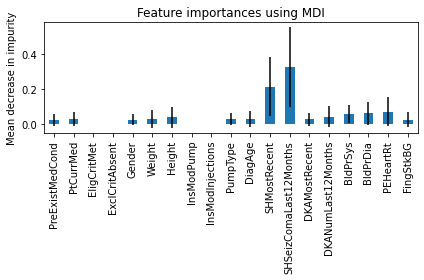

In [27]:
import pandas as pd
feature_names3=Xd.columns

forest_importances = pd.Series(importances2, index=feature_names3)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [28]:
def plot_feature_importances(forest2):
    n_features = Xd.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), forest2.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), Xd_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

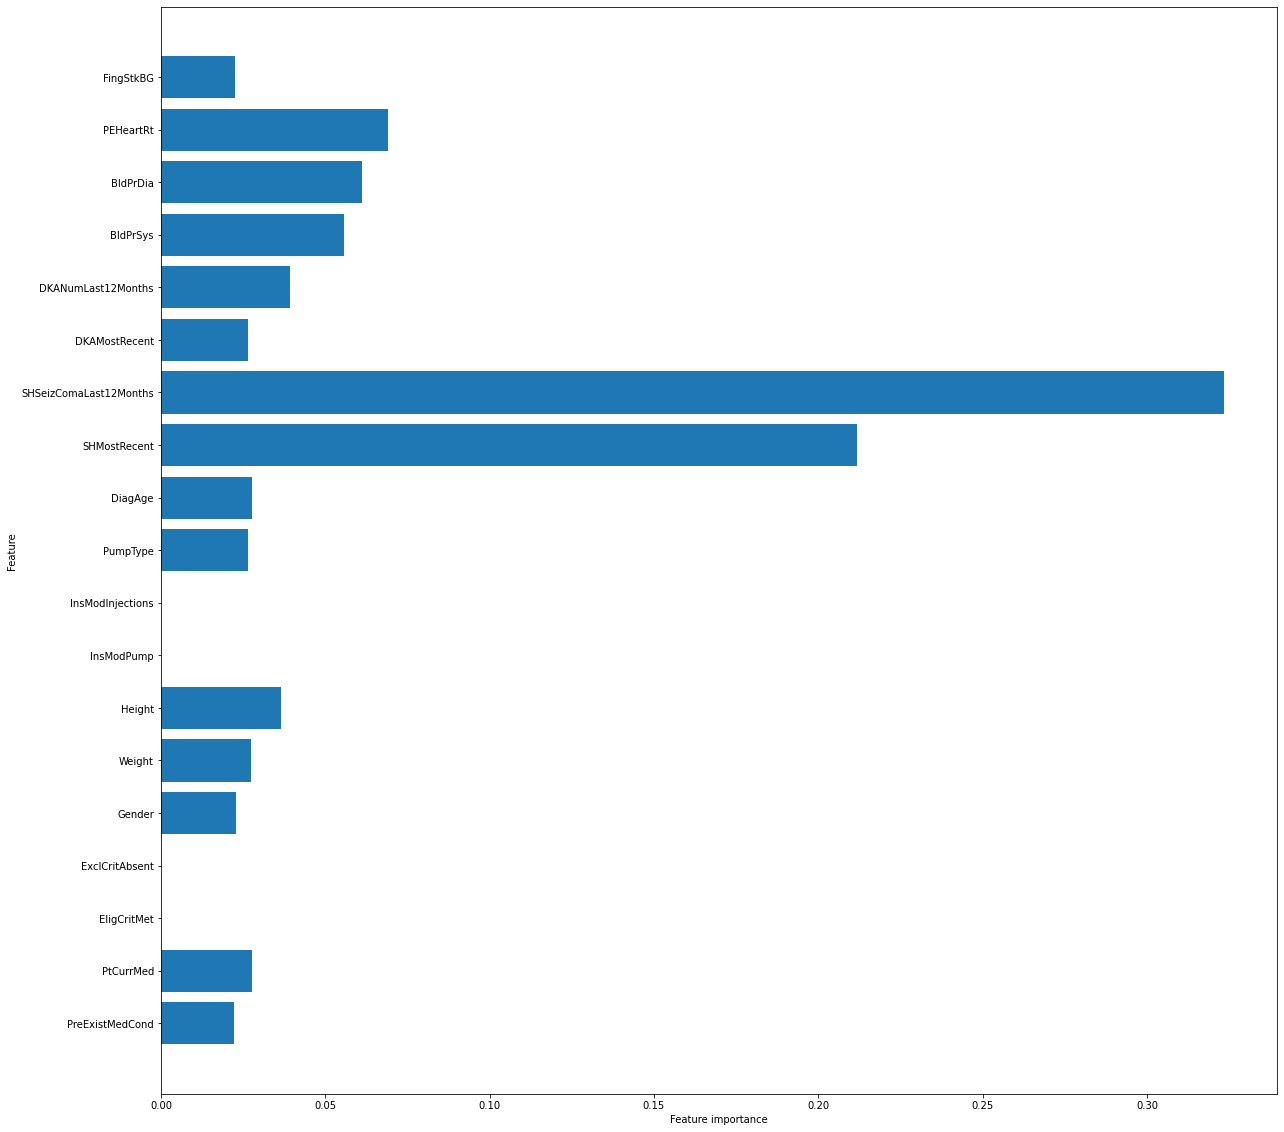

In [29]:
plot_feature_importances(forest2)

In [30]:
Xd_train.shape

(320, 19)

In [31]:
#Logistic Regression

lm_logistic_Xd = LogisticRegression(random_state=0,max_iter=200)
model_logistic_Xd = lm_logistic_Xd.fit(Xd_train, Yd_train.values.ravel())
model_logistic_Xd
model_logistic_Xd.score(Xd_test, Yd_test)
pred_proba_df_Xd = pd.DataFrame(model_logistic_Xd.predict_proba(Xd_test))
threshold_list_Xd = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list_Xd:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = np.array(pred_proba_df_Xd.iloc[:,1].apply(lambda x: 1 if x>i else 0))
    test_accuracy_Xd = metrics.accuracy_score(np.array(Yd_test), y_test_pred)
    print('Our testing accuracy is {}'.format(test_accuracy_Xd))


******** For i = 0.05 ******
Our testing accuracy is 0.9125

******** For i = 0.1 ******
Our testing accuracy is 0.9125

******** For i = 0.15 ******
Our testing accuracy is 0.95

******** For i = 0.2 ******
Our testing accuracy is 0.95

******** For i = 0.25 ******
Our testing accuracy is 0.9625

******** For i = 0.3 ******
Our testing accuracy is 0.9625

******** For i = 0.35 ******
Our testing accuracy is 0.9625

******** For i = 0.4 ******
Our testing accuracy is 0.9625

******** For i = 0.45 ******
Our testing accuracy is 0.975

******** For i = 0.5 ******
Our testing accuracy is 0.975

******** For i = 0.55 ******
Our testing accuracy is 0.975

******** For i = 0.6 ******
Our testing accuracy is 0.975

******** For i = 0.65 ******
Our testing accuracy is 0.975

******** For i = 0.7 ******
Our testing accuracy is 0.975

******** For i = 0.75 ******
Our testing accuracy is 0.975

******** For i = 0.8 ******
Our testing accuracy is 0.975

******** For i = 0.85 ******
Our testing ac

In [32]:
#Deep learning model

In [33]:
Xd.columns

Index(['PreExistMedCond', 'PtCurrMed', 'EligCritMet', 'ExclCritAbsent',
       'Gender', 'Weight', 'Height', 'InsModPump', 'InsModInjections',
       'PumpType', 'DiagAge', 'SHMostRecent', 'SHSeizComaLast12Months',
       'DKAMostRecent', 'DKANumLast12Months', 'BldPrSys', 'BldPrDia',
       'PEHeartRt', 'FingStkBG'],
      dtype='object')

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import math
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from skmultilearn.adapt import MLkNN

Using TensorFlow backend.


In [35]:
model_Xd = Sequential()
model_Xd.add(Dense(12, input_dim=19, activation='relu'))
model_Xd.add(Dense(10, activation='relu'))
model_Xd.add(Dense(1, activation='sigmoid'))

model_Xd.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model_Xd.fit(Xd_train, Yd_train, epochs=30, batch_size=10)
# evaluate the keras model
_, accuracy = model_Xd.evaluate(Xd_test, Yd_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/30
320/320 [==============================] - 0s 488us/step - loss: 19.8812 - accuracy: 0.1250
Epoch 2/30
320/320 [==============================] - 0s 86us/step - loss: 1.3238 - accuracy: 0.8719
Epoch 3/30
320/320 [==============================] - 0s 84us/step - loss: 0.7902 - accuracy: 0.8719
Epoch 4/30
320/320 [==============================] - 0s 78us/step - loss: 0.6313 - accuracy: 0.8625
Epoch 5/30
320/320 [==============================] - 0s 74us/step - loss: 0.5925 - accuracy: 0.8562
Epoch 6/30
320/320 [==============================] - 0s 73us/step - loss: 0.5858 - accuracy: 0.8531
Epoch 7/30
320/320 [==============================] - 0s 71us/step - loss: 0.5611 - accuracy: 0.8375
Epoch 8/30
320/320 [==============================] - 0s 72us/step - loss: 0.5460 - accuracy: 0.8687
Epoch 9/30
320/320 [==============================] - 0s 100us/step - loss: 0.5201 - accuracy: 0.8438
Epoch 10/30
320/320 [==============================] - 0s 87us/step - loss: 0.5141 - acc

In [36]:
#Accuracy Prediction
model_Xd.predict(Xd_test)
prediction_Xd= model_Xd.predict(Xd_test)
prediction_Xd[prediction_Xd < 0.1] = 0
prediction_Xd[prediction_Xd >= 0.1] = 1

metrics.accuracy_score(prediction_Xd,Yd_test)

0.675

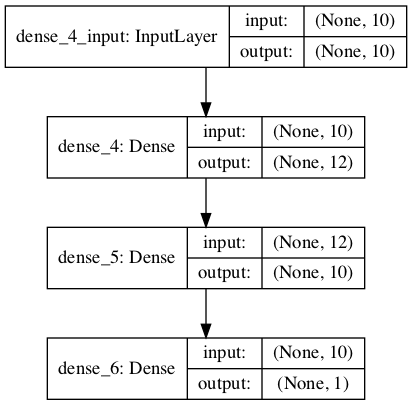

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model_Xd = Sequential()
model_Xd.add(Dense(12, input_dim=10, activation='relu'))
model_Xd.add(Dense(10, activation='relu'))
model_Xd.add(Dense(1, activation='sigmoid'))
plot_model(model_Xd, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

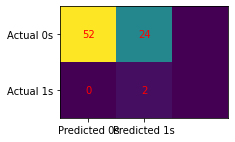

In [38]:
cm = metrics.confusion_matrix(Yd_test,prediction_Xd) 
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

###  Ensemble Xd dataset

In [39]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
base = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                       max_depth=5, min_samples_split=2, min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, max_features=7, random_state=None, 
                                       max_leaf_nodes=22, min_impurity_split=1e-07, 
                                           class_weight='balanced')

model_Xd = BaggingClassifier(base_estimator=base, n_estimators=100, max_samples=1.0, max_features=1.0, 
                  bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, 
                  n_jobs=1, random_state=None, verbose=0)
model_Xd.fit(Xd_train, Yd_train)
predictions_Xd = model_Xd.predict(Xd_test)
conf_Xd = (confusion_matrix(Yd_test,predictions_Xd))
test_accuracy_Xd = metrics.accuracy_score(np.array(Yd_test), predictions_Xd)
test_accuracy_Xd

1.0

In [40]:
model_rf_Xd = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, 
                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                       max_features='auto', max_leaf_nodes=22, min_impurity_split=1e-07, 
                       bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                       warm_start=False, class_weight='balanced')
model_rf_Xd.fit(Xd_train, Yd_train)
predictions_Xd = model_rf_Xd.predict(Xd_test)
conf_Xd = (confusion_matrix(Yd_test,predictions_Xd))
test_accuracy_rf_Xd = metrics.accuracy_score(np.array(Yd_test), predictions_Xd)
test_accuracy_rf_Xd

1.0

In [41]:
from sklearn.ensemble import VotingClassifier
mods = []
for i in range(1,100): # 100 Trees provides low variance.
    # A parameter combination that were sucessfull for entropy trees.
    mods.append((str(i),DecisionTreeClassifier(criterion='entropy', splitter='best', 
                               max_depth=5, min_samples_split=2, min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                               max_leaf_nodes=22, min_impurity_split=1e-07, class_weight='balanced')))
    if(i < 80):
        # A parameter combination that were sucessfull for gini trees.
        mods.append((str(i)+"gi",DecisionTreeClassifier(criterion='gini', splitter='best', 
                               max_depth=7, min_samples_split=2, min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                               max_leaf_nodes=25, min_impurity_split=1e-07, 
                                                        class_weight={0: 1.105, 1: 1.15})))
model_Xd = VotingClassifier(estimators=mods, voting='hard', n_jobs=1)
model_Xd.fit(Xd_train, Yd_train)
predictions_Xd = model_Xd.predict(Xd_test)
conf_Xd = (confusion_matrix(Yd_test,predictions_Xd))
test_accuracy_Xd = metrics.accuracy_score(np.array(Yd_test), predictions_Xd)
test_accuracy_Xd


0.9125

In [42]:
AdvEvent_data.shape

(76, 47)

In [43]:
#Diabetes_Data
Diabetes1=pd.merge(Diabetes_Data, AdvEvent_data, how='right', left_on='PtID_x', right_on = 'PtID')
Diabetes1

PtID_x  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0        33         1.000000          0            1               1       0   
1        33         1.000000          0            1               1       0   
2        10         0.000000          1            1               1       0   
3        10         0.000000          1            1               1       0   
4        15         0.184987          0            1               1       0   
..      ...              ...        ...          ...             ...     ...   
201      58         1.000000          0            1               1       1   
202      58         1.000000          0            1               1       1   
203      89         0.000000          0            1               1       1   
204      89         0.000000          0            1               1       1   
205      89         0.000000          0            1               1       1   

      Weight_x      Height  InsModPump  InsModInjections  ...  MMAESerious  \
0    25.590654  115.782243         1.0               1.0  ...           No   
1    25.590654  115.782243         1.0               1.0  ...           No   
2    25.590654  115.782243         1.0               1.0  ...          Yes   
3    25.590654  115.782243         1.0               1.0  ...          Yes   
4    25.590654  115.782243         1.0               1.0  ...          NaN   
..         ...         ...         ...               ...  ...          ...   
201  25.590654  115.782243         1.0               1.0  ...          Yes   
202  25.590654  115.782243         1.0               1.0  ...          Yes   
203  25.590654  115.782243         1.0               1.0  ...           No   
204  25.590654  115.782243         1.0               1.0  ...           No   
205  25.590654  115.782243         1.0               1.0  ...           No   

     MMUnexpected AERelStdyDrugDevice  AERelStdyDrugDeviceUncertain  \
0             NaN                 NaN                           NaN   
1             NaN                 NaN                           NaN   
2             NaN                 NaN                           NaN   
3             NaN                 NaN                           NaN   
4             NaN                 NaN                           NaN   
..            ...                 ...                           ...   
201           NaN                 NaN                           NaN   
202           NaN                 NaN                           NaN   
203           NaN                 NaN                           NaN   
204           NaN                 NaN                           NaN   
205           NaN                 NaN                           NaN   

     MMHospDiscRptObtained  AERelStdyTrtHighLvl  AERelStdyTrtWhich  \
0                      NaN                  NaN                NaN   
1                      NaN                  NaN                NaN   
2                       No                  NaN                NaN   
3                       No                  NaN                NaN   
4                      NaN                  NaN                NaN   
..                     ...                  ...                ...   
201                     No                  NaN                NaN   
202                     No                  NaN                NaN   
203                     No                  NaN                NaN   
204                     No                  NaN                NaN   
205                     No                  NaN                NaN   

     AERelStdyDrugDeviceHighLvl  AERelStdyDrugDeviceWhich  \
0                           NaN                       NaN   
1                           NaN                       NaN   
2                           NaN                       NaN   
3                           NaN                       NaN   
4                           NaN                       NaN   
..                          ...                

In [44]:
Diabetes1 = Diabetes1.fillna(Diabetes1.mean())
Diabetes1 = Diabetes1.fillna(0)


In [45]:
Q={'Yes':1,'No':0, 'NaN':0}
DiabScreening_data['PreExistMedCond']=DiabScreening_data['PreExistMedCond'].map(Q).fillna(DiabScreening_data['PreExistMedCond'])
R={'Yes':1,'No':0}
DiabScreening_data['PtCurrMed']=DiabScreening_data['PtCurrMed'].map(R).fillna(DiabScreening_data['PtCurrMed'])
A={'M':1,'F':0}
DiabScreening_data['Gender']=DiabScreening_data['Gender'].map(A).fillna(DiabScreening_data['Gender'])
B={'Animas One Touch Ping':1,'Animas Vibe':2, 'Insulet OmniPod Insulin Management System':3,'Medtronic 551 (530G)':4,'Medtronic Paradigm 523 (Revel)':5,'Medtronic Paradigm 723 (Revel)':6,'MiniMed 630G':7,'Tandem t:slim':8,'Tandem t:slim X2':9,'Other':10}
DiabScreening_data['PumpType']=DiabScreening_data['PumpType'].map(B).fillna(DiabScreening_data['PumpType'])
D={'Yes':1,'No':0}
DiabScreening_data['PEAbnormal']=DiabScreening_data['PEAbnormal'].map(D).fillna(DiabScreening_data['PEAbnormal'])
E={'< 3 months ago':1,'Never':0,'3-<6 months ago':2,'1-<5 years ago':3,'5-<10 years ago':4,'6-<12 months ago':5}
DiabScreening_data['DKAMostRecent']=DiabScreening_data['DKAMostRecent'].map(E).fillna(DiabScreening_data['DKAMostRecent'])
F={'< 3 months ago':1,'Never':0,'3-<6 months ago':2,'1-<5 years ago':3,'5-<10 years ago':4,'6-<12 months ago':5}
DiabScreening_data['DKAMostRecent']=DiabScreening_data['DKAMostRecent'].map(F).fillna(DiabScreening_data['DKAMostRecent'])
G={'< 3 months ago':1,'Never':0,'3-<6 months ago':2,'1-<5 years ago':3,'5-<10 years ago':4,'6-<12 months ago':5}
DiabScreening_data['SHMostRecent']=DiabScreening_data['SHMostRecent'].map(G).fillna(DiabScreening_data['SHMostRecent'])

H={'Lipoatrophy':1,'Hypoglycaemic seizure':2, 'Hypoglycemia':3,'Post procedural complication':4,'Cough':5, 'Vomiting':6,'Diabetic ketoacidosis':7,'Viral syndrome':8,'Ketosis':9,'Urinary tract infection':10,'Gastroenteritis':11,'Type I diabetes mellitus':12,'Skin injury':13,'Overdose accidental':14,'Appendicitis':15,'Hyperglycemia':16}
Diabetes1['MedicalCondition']=Diabetes1['MedicalCondition'].map(H).fillna(Diabetes1['MedicalCondition'])


I={'Lipoatrophy':1,'Hypoglycaemic seizure':2, 'Hypoglycemia':3,'Post procedural complication':4,'Cough':5, 'Vomiting':6,'Diabetic ketoacidosis':7,'Viral syndrome':8,'Ketosis':9,'Urinary tract infection':10,'Gastroenteritis':11,'Type I diabetes mellitus':12,'Skin injury':13,'Overdose accidental':14,'Appendicitis':15,'Hyperglycemia':16}
Diabetes1['MedicalConditionMM']=Diabetes1['MedicalConditionMM'].map(I).fillna(Diabetes1['MedicalConditionMM'])

K={'Yes':1,'No':0}
Diabetes1['AEPrEnroll']=Diabetes1['AEPrEnroll'].map(K).fillna(Diabetes1['AEPrEnroll'])

L={'Yes':1,'No':0}
Diabetes1['AENotedStdyVisExam']=Diabetes1['AENotedStdyVisExam'].map(L).fillna(Diabetes1['AENotedStdyVisExam'])

M={'Yes':1,'No':0}
Diabetes1['AERelStdyTrt']=Diabetes1['AERelStdyTrt'].map(M).fillna(Diabetes1['AERelStdyTrt'])

N={'Yes':1,'No':0}
Diabetes1['AERelStdyProc']=Diabetes1['AERelStdyProc'].map(N).fillna(Diabetes1['AERelStdyProc'])

O={'Yes':1,'No':0}
Diabetes1['AESerious']=Diabetes1['AESerious'].map(O).fillna(Diabetes1['AESerious'])

P={'Yes':1,'No':0}
Diabetes1['AETrt']=Diabetes1['AETrt'].map(P).fillna(Diabetes1['AETrt'])

C={'Yes':1,'No':0}
Diabetes1['AESurg']=Diabetes1['AESurg'].map(C).fillna(Diabetes1['AESurg'])

a={'Yes':1,'No':0}
Diabetes1['AEOthTrt']=Diabetes1['AEOthTrt'].map(a).fillna(Diabetes1['AEOthTrt'])

S={'Yes':1,'No':0}
Diabetes1['AERelLabData']=Diabetes1['AERelLabData'].map(S).fillna(Diabetes1['AERelLabData'])

T={'Yes':1,'No':0}
Diabetes1['AEOthRelHx']=Diabetes1['AEOthRelHx'].map(T).fillna(Diabetes1['AEOthRelHx'])

U={'Yes':1,'No':0}
Diabetes1['AEMedProd']=Diabetes1['AEMedProd'].map(U).fillna(Diabetes1['AEMedProd'])

V={'Yes':1,'No':0}
Diabetes1['MMAERelStdyTrt']=Diabetes1['MMAERelStdyTrt'].map(V).fillna(Diabetes1['MMAERelStdyTrt'])

W={'Yes':1,'No':0}
Diabetes1['MMHospDiscRptObtained']=Diabetes1['MMHospDiscRptObtained'].map(W).fillna(Diabetes1['MMHospDiscRptObtained'])

X={'Mild':1,'Moderate':2,'Severe':3}
Diabetes1['AEIntensity']=Diabetes1['AEIntensity'].map(X).fillna(Diabetes1['AEIntensity'])

Y={'Reduced use frequency/schedule':1,'No change':2,'Discontinued temporarily':3}
Diabetes1['AEEffectTrt']=Diabetes1['AEEffectTrt'].map(Y).fillna(Diabetes1['AEEffectTrt'])

b={'Ongoing (further improvement / worsening possible)':1,'Complete Recovery':0}
Diabetes1['AEOutcome']=Diabetes1['AEOutcome'].map(b).fillna(Diabetes1['AEOutcome'])

J={'Yes':1,'No':0}
Diabetes1['MMAESerious']=Diabetes1['MMAESerious'].map(J).fillna(Diabetes1['MMAESerious'])




In [46]:
Diabetes1 = Diabetes1.fillna(Diabetes1.mean())
Diabetes1 = Diabetes1.fillna(0)


### Feature Selection

In [47]:
Diabetes1

PtID_x  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0        33         1.000000          0            1               1       0   
1        33         1.000000          0            1               1       0   
2        10         0.000000          1            1               1       0   
3        10         0.000000          1            1               1       0   
4        15         0.184987          0            1               1       0   
..      ...              ...        ...          ...             ...     ...   
201      58         1.000000          0            1               1       1   
202      58         1.000000          0            1               1       1   
203      89         0.000000          0            1               1       1   
204      89         0.000000          0            1               1       1   
205      89         0.000000          0            1               1       1   

      Weight_x      Height  InsModPump  InsModInjections  ...  MMAESerious  \
0    25.590654  115.782243         1.0               1.0  ...          0.0   
1    25.590654  115.782243         1.0               1.0  ...          0.0   
2    25.590654  115.782243         1.0               1.0  ...          1.0   
3    25.590654  115.782243         1.0               1.0  ...          1.0   
4    25.590654  115.782243         1.0               1.0  ...          0.0   
..         ...         ...         ...               ...  ...          ...   
201  25.590654  115.782243         1.0               1.0  ...          1.0   
202  25.590654  115.782243         1.0               1.0  ...          1.0   
203  25.590654  115.782243         1.0               1.0  ...          0.0   
204  25.590654  115.782243         1.0               1.0  ...          0.0   
205  25.590654  115.782243         1.0               1.0  ...          0.0   

     MMUnexpected  AERelStdyDrugDevice  AERelStdyDrugDeviceUncertain  \
0             0.0                  0.0                           0.0   
1             0.0                  0.0                           0.0   
2             0.0                  0.0                           0.0   
3             0.0                  0.0                           0.0   
4             0.0                  0.0                           0.0   
..            ...                  ...                           ...   
201           0.0                  0.0                           0.0   
202           0.0                  0.0                           0.0   
203           0.0                  0.0                           0.0   
204           0.0                  0.0                           0.0   
205           0.0                  0.0                           0.0   

     MMHospDiscRptObtained  AERelStdyTrtHighLvl  AERelStdyTrtWhich  \
0                      0.0                  0.0                0.0   
1                      0.0                  0.0                0.0   
2                      0.0                  0.0                0.0   
3                      0.0                  0.0                0.0   
4                      0.0                  0.0                0.0   
..                     ...                  ...                ...   
201                    0.0                  0.0                0.0   
202                    0.0                  0.0                0.0   
203                    0.0                  0.0                0.0   
204                    0.0                  0.0                0.0   
205                    0.0                  0.0                0.0   

     AERelStdyDrugDeviceHighLvl  AERelStdyDrugDeviceWhich  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
..                          ...    

In [48]:
Diabetes1.columns

Index(['PtID_x', 'PreExistMedCond', 'PtCurrMed', 'EligCritMet',
       'ExclCritAbsent', 'Gender', 'Weight_x', 'Height', 'InsModPump',
       'InsModInjections', 'PumpType', 'DiagAge', 'PEAbnormal_x',
       'SHMostRecent', 'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months', 'PtID_y', 'BldPrSys', 'BldPrDia', 'PEHeartRt',
       'FingStkBG', 'PEAbnormal_y', 'RecID', 'PtID', 'ParentLoginVisitID',
       'AENotifiedDt', 'MedicalCondition', 'MedicalConditionMM',
       'AdverseEventType', 'AEOnsetDt', 'AEPrEnroll', 'AENotedStdyVisExam',
       'AEIntensity', 'AERelStdyTrt', 'AERelStdyTrtUncertain', 'AERelStdyProc',
       'AEEffectTrt', 'AESerious', 'AETrt', 'AESurg', 'AESurgDt', 'AEOthTrt',
       'AEOutcome', 'AEResDt', 'AEDeathCause', 'AEDeathDt', 'AEDeath',
       'AEConAnomaly', 'AELifeThreat', 'AEHosp', 'AEDisability', 'AEOther',
       'Weight_y', 'WeightMeas', 'WeightNotAvail', 'AERelLabData',
       'AEOthRelHx', 'AEMedProd', 'MMAERelStdyTrt', 'MM

In [49]:
Diabetes1= Diabetes1.drop(['Weight_x','PEAbnormal_x','PEAbnormal_y','MMUnexpected','AERelStdyDrugDevice','AERelStdyDrugDeviceUncertain','AEDeathCause','WeightMeas','AEDeathCause','AEDeath','AEDeathDt','AESurgDt','AEOnsetDt','PtID_x','PtID_y','RecID', 'PtID', 'ParentLoginVisitID','AENotifiedDt','AEOnsetDt','AEResDt','WeightMeas','AdverseEventType','AERelStdyTrtUncertain','MMUnexpected','AERelStdyDrugDevice','AERelStdyDrugDeviceUncertain','AERelStdyTrtHighLvl','AERelStdyTrtWhich','AERelStdyDrugDeviceHighLvl'
], axis=1)


In [50]:
Ya = Diabetes1['SHSeizComa']
Xa = Diabetes1.drop(['SHSeizComa'], axis=1)


In [51]:
print(type(Ya))

<class 'pandas.core.series.Series'>


In [52]:
Xa.shape

(206, 46)

In [53]:
Xa_train, Xa_test, Ya_train, Ya_test = train_test_split(Xa, Ya, test_size=0.20, random_state=42)

In [54]:
Ya_test.shape

(42,)

In [55]:
#x_train, x_test, y_train, y_test
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(Xa.shape[1])]
forest1 = RandomForestClassifier(random_state=0)
forest1.fit(Xa_train, Ya_train)

RandomForestClassifier(random_state=0)

In [56]:
import time
import numpy as np

start_time = time.time()
importances1 = forest1.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest1.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


In [57]:
def plot_feature_importances(forest1):
    n_features = Xa.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), forest1.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), Xa_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [58]:
Xa_train.shape

(164, 46)

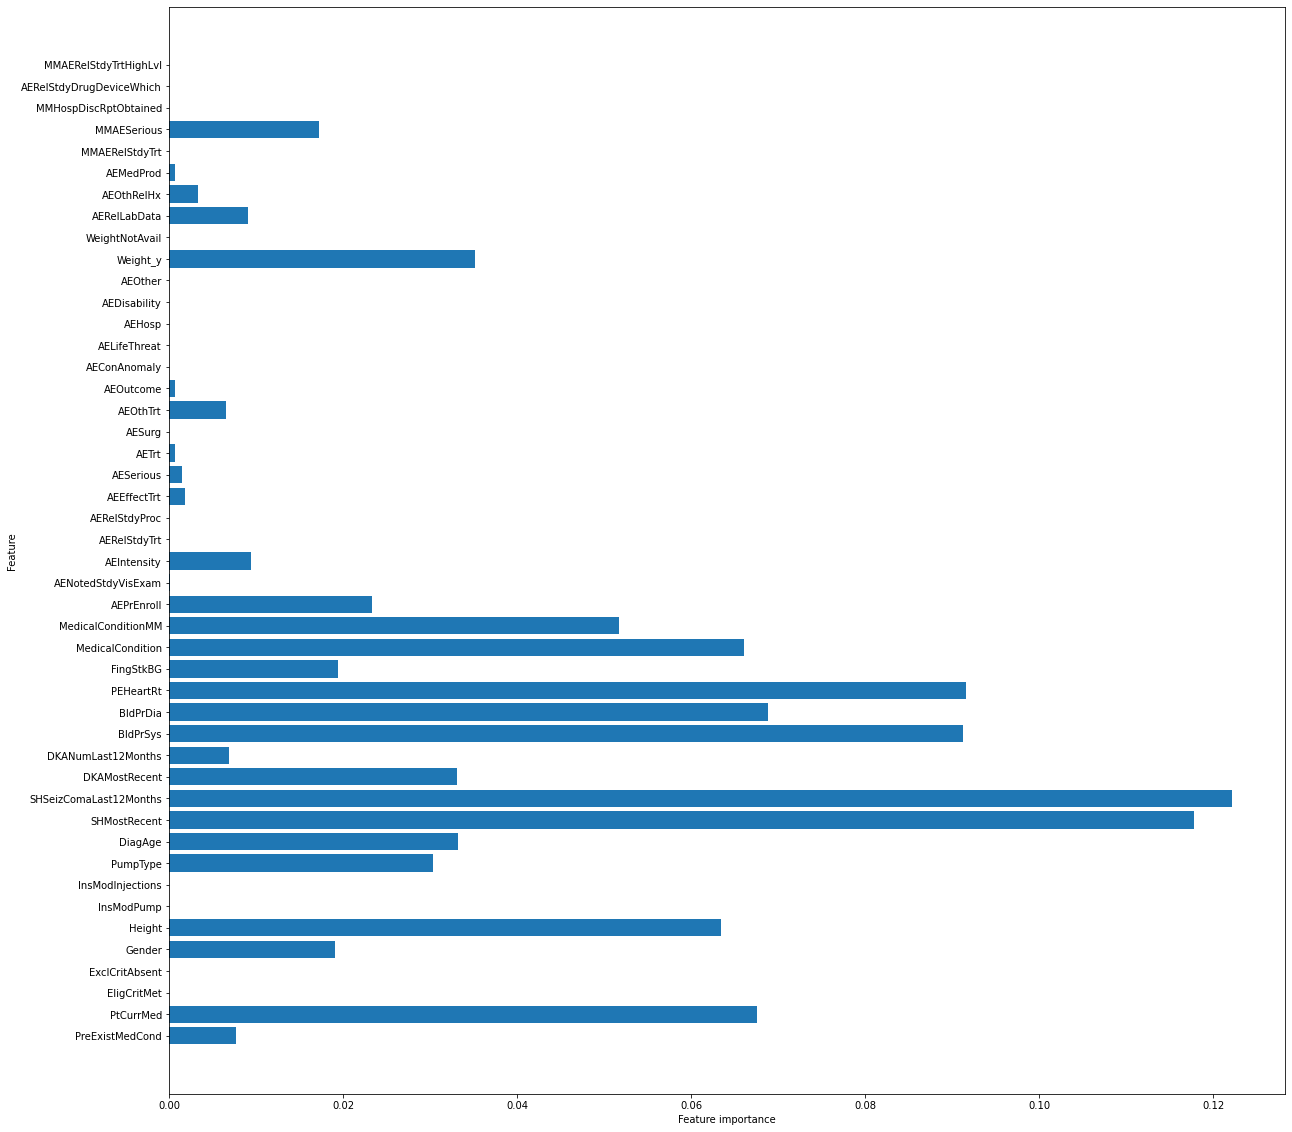

In [59]:
plot_feature_importances(forest1)

### Model with DiabScreening_data and DiabPhysExam
### Logistic Regression

In [60]:
lm_logistic = LogisticRegression(random_state=0,max_iter=200)
model_logistic = lm_logistic.fit(Xa_train, Ya_train.values.ravel())
model_logistic
model_logistic.score(Xa_test, Ya_test)
pred_proba_df = pd.DataFrame(model_logistic.predict_proba(Xa_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = np.array(pred_proba_df.iloc[:,1].apply(lambda x: 1 if x>i else 0))
    test_accuracy = metrics.accuracy_score(np.array(Ya_test), y_test_pred)
    print('Our testing accuracy is {}'.format(test_accuracy))


******** For i = 0.05 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.1 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.15 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.2 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.25 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.3 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.35 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.4 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.45 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.5 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.55 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.6 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.65 ******
Our testing accuracy is 0.9285714285714286

******** For i = 0.7 ******
Our testing accuracy is 0.92

### Deep learning model 

In [61]:
Xa.columns

Index(['PreExistMedCond', 'PtCurrMed', 'EligCritMet', 'ExclCritAbsent',
       'Gender', 'Height', 'InsModPump', 'InsModInjections', 'PumpType',
       'DiagAge', 'SHMostRecent', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months', 'BldPrSys', 'BldPrDia', 'PEHeartRt', 'FingStkBG',
       'MedicalCondition', 'MedicalConditionMM', 'AEPrEnroll',
       'AENotedStdyVisExam', 'AEIntensity', 'AERelStdyTrt', 'AERelStdyProc',
       'AEEffectTrt', 'AESerious', 'AETrt', 'AESurg', 'AEOthTrt', 'AEOutcome',
       'AEConAnomaly', 'AELifeThreat', 'AEHosp', 'AEDisability', 'AEOther',
       'Weight_y', 'WeightNotAvail', 'AERelLabData', 'AEOthRelHx', 'AEMedProd',
       'MMAERelStdyTrt', 'MMAESerious', 'MMHospDiscRptObtained',
       'AERelStdyDrugDeviceWhich', 'MMAERelStdyTrtHighLvl'],
      dtype='object')

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import math
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from skmultilearn.adapt import MLkNN

In [63]:
model_Xa = Sequential()
model_Xa.add(Dense(12, input_dim=46, activation='relu'))
model_Xa.add(Dense(10, activation='relu'))
model_Xa.add(Dense(1, activation='sigmoid'))

model_Xa.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model_Xa.fit(Xa_train, Ya_train, epochs=30, batch_size=10)
# evaluate the keras model
_, accuracy = model_Xa.evaluate(Xa_test, Ya_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/30
164/164 [==============================] - 0s 779us/step - loss: 36.6657 - accuracy: 0.0183
Epoch 2/30
164/164 [==============================] - 0s 89us/step - loss: 22.3487 - accuracy: 0.0183
Epoch 3/30
164/164 [==============================] - 0s 95us/step - loss: 10.4836 - accuracy: 0.0488
Epoch 4/30
164/164 [==============================] - 0s 96us/step - loss: 2.1432 - accuracy: 0.5427
Epoch 5/30
164/164 [==============================] - 0s 91us/step - loss: 1.2223 - accuracy: 0.8415
Epoch 6/30
164/164 [==============================] - 0s 94us/step - loss: 1.1333 - accuracy: 0.8659
Epoch 7/30
164/164 [==============================] - 0s 82us/step - loss: 1.0705 - accuracy: 0.8659
Epoch 8/30
164/164 [==============================] - 0s 80us/step - loss: 1.0184 - accuracy: 0.8659
Epoch 9/30
164/164 [==============================] - 0s 84us/step - loss: 0.9630 - accuracy: 0.8659
Epoch 10/30
164/164 [==============================] - 0s 83us/step - loss: 0.8926 - ac

In [64]:
#Accuracy Prediction
model_Xa.predict(Xa_test)
prediction_Xa= model_Xa.predict(Xa_test)
prediction_Xa[prediction_Xa < 0.1] = 0
prediction_Xa[prediction_Xa >= 0.1] = 1

metrics.accuracy_score(prediction_Xa,Ya_test)

0.8333333333333334

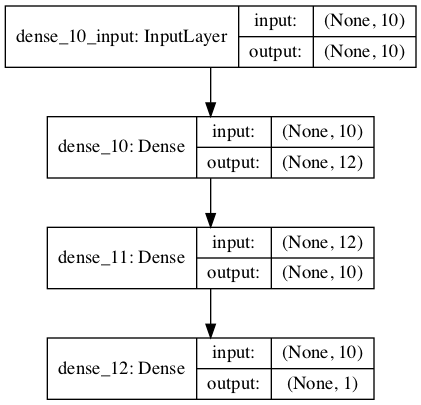

In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model_Xa = Sequential()
model_Xa.add(Dense(12, input_dim=10, activation='relu'))
model_Xa.add(Dense(10, activation='relu'))
model_Xa.add(Dense(1, activation='sigmoid'))
plot_model(model_Xa, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

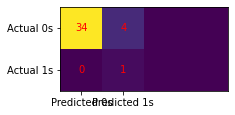

In [66]:
cm = metrics.confusion_matrix(Ya_test,prediction_Xa) 
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Visualizations

In [67]:
DiabScreening_data.columns

Index(['RecID', 'PtID', 'ParentLoginVisitID', 'EligCritMet', 'ExclCritAbsent',
       'Gender', 'Ethnicity', 'Race', 'DiagDt', 'DiagAge', 'SHMostRecent',
       'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months', 'InsModPump', 'InsModInjections', 'InsModInhaled',
       'InsModNone', 'PumpUse', 'PumpType', 'UnitsInsTotal',
       'UnitsInsBasilOrLongAct', 'NumPumpBolusOrShortAct', 'BGTestAvgNumMeter',
       'BGTestMetDatNotAvail', 'BGTestAvgNumPtRep', 'BGTestPtRepNotAvail',
       'CGMUseStat', 'CGMUseDur', 'Weight', 'WeightUnits', 'WeightUnk',
       'Height', 'HeightUnits', 'HeightUnk', 'BldPrSys', 'BldPrDia',
       'BldPrUnk', 'PEAbnormal', 'PreExistMedCond', 'PtCurrMed', 'SHNumEverB'],
      dtype='object')

In [68]:
import plotly.express as px
fig1 = px.histogram(DiabScreening_data, x="InsModInjections", nbins=20,color='SHMostRecent', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [69]:
import plotly.express as px
fig1 = px.histogram(DiabScreening_data, x="PumpUse", nbins=20,color='SHSeizComaLast12Months', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [70]:
import plotly.express as px
fig1 = px.histogram(Diabetes1, x="PumpType", nbins=20,color='SHSeizComaLast12Months', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [71]:
import plotly.express as px
fig1 = px.histogram(Diabetes1, x="MedicalCondition", nbins=20,color='SHSeizComaLast12Months', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [72]:
import plotly.express as px
fig1 = px.histogram(Diabetes1, x="MedicalCondition", nbins=20,color='SHMostRecent', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [73]:
import plotly.express as px
fig1 = px.histogram(DiabScreening_data, x="Ethnicity", nbins=20,color='SHMostRecent', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [74]:
import plotly.express as px
fig1 = px.histogram(DiabScreening_data, x="Gender", nbins=20,color='SHMostRecent', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [75]:

import plotly.express as px
fig1 = px.histogram(DiabScreening_data, x="Race", nbins=20,color='SHMostRecent', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [76]:
import plotly.express as px
fig1 = px.histogram(DiabScreening_data, x="Gender", nbins=20,color='SHSeizComaLast12Months', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [77]:
import plotly.express as px
fig1 = px.histogram(DiabScreening_data, x="Race", nbins=20,color='SHSeizComaLast12Months', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [78]:
import plotly.express as px
fig1 = px.histogram(DiabScreening_data, x="Ethnicity", nbins=20,color='SHSeizComaLast12Months', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [79]:
import plotly.express as px
fig1 = px.histogram(Diab1, x="FingStkBG", nbins=20,color='SHMostRecent', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=500,height=400)
fig1.show()

In [80]:
import plotly.express as px
fig1 = px.histogram(Diab1, x="FingStkBG", nbins=20,color='SHSeizComaLast12Months', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [81]:
import plotly.express as px
fig1 = px.histogram(Diab1, x="FingStkBG", nbins=20,color='DiagAge', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [82]:
import plotly.express as px
fig1 = px.histogram(Diab1, x="DiagAge", nbins=20,color='FingStkBG', color_discrete_sequence=['skyblue','pink', 'red','green','purple', 'grey']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [83]:
import plotly.express as px
fig1 = px.histogram(Diab1, x="BldPrDia", nbins=20,color='FingStkBG', color_discrete_sequence=['skyblue','pink', 'red','green','purple', 'grey']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=700,height=500)
fig1.show()

In [84]:
import plotly.express as px
fig1 = px.histogram(Diab1, x="DiagAge", nbins=20,color='SHMostRecent', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=500,height=400)
fig1.show()

In [85]:
import plotly.express as px
fig1 = px.histogram(Diab1, x="DiagAge", nbins=20,color='SHMostRecent', color_discrete_sequence=['skyblue','pink']) 
fig1.update_traces(opacity=0.8, selector=dict(type='histogram'))
fig1.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=1.5, opacity=0.6)
fig1.update_layout(autosize=True, width=500,height=400)
fig1.show()

### Ensemble Model

In [86]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
base = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                       max_depth=5, min_samples_split=2, min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, max_features=7, random_state=None, 
                                       max_leaf_nodes=22, min_impurity_split=1e-07, 
                                           class_weight='balanced')

model_Xa = BaggingClassifier(base_estimator=base, n_estimators=100, max_samples=1.0, max_features=1.0, 
                  bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, 
                  n_jobs=1, random_state=None, verbose=0)
model_Xa.fit(Xa_train, Ya_train)
predictions_Xa = model_Xa.predict(Xa_test)
conf_Xa = (confusion_matrix(Ya_test,predictions_Xa))
test_accuracy_Xa = metrics.accuracy_score(np.array(Ya_test), predictions_Xa)
test_accuracy_Xa

1.0

In [87]:
model_rf_Xa = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, 
                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                       max_features='auto', max_leaf_nodes=22, min_impurity_split=1e-07, 
                       bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                       warm_start=False, class_weight='balanced')
model_rf_Xa.fit(Xa_train, Ya_train)
predictions_Xa = model_rf_Xa.predict(Xa_test)
conf = (confusion_matrix(Ya_test,predictions_Xa))
test_accuracy_rf_Xa = metrics.accuracy_score(np.array(Ya_test), predictions_Xa)
test_accuracy_rf_Xa

1.0

In [88]:
from sklearn.ensemble import VotingClassifier
mods = []
for i in range(1,100): # 100 Trees provides low variance.
    # A parameter combination that were sucessfull for entropy trees.
    mods.append((str(i),DecisionTreeClassifier(criterion='entropy', splitter='best', 
                               max_depth=5, min_samples_split=2, min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                               max_leaf_nodes=22, min_impurity_split=1e-07, class_weight='balanced')))
    if(i < 80):
        # A parameter combination that were sucessfull for gini trees.
        mods.append((str(i)+"gi",DecisionTreeClassifier(criterion='gini', splitter='best', 
                               max_depth=7, min_samples_split=2, min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                               max_leaf_nodes=25, min_impurity_split=1e-07, 
                                                        class_weight={0: 1.105, 1: 1.15})))
model_Xa = VotingClassifier(estimators=mods, voting='hard', n_jobs=1)
model_Xa.fit(Xa_train, Ya_train)
predictions_Xa = model_Xa.predict(Xa_test)
conf_Xa = (confusion_matrix(Ya_test,predictions_Xa))
test_accuracy_Xa = metrics.accuracy_score(np.array(Ya_test), predictions_Xa)
test_accuracy_Xa

1.0

### Comparing models with K-fold cross validation using accuracy Xa_train

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [90]:
#missing_values='NaN'
pipeline = Pipeline([("imputer", SimpleImputer(missing_values = np.nan,
                                          strategy="mean"
                                          )),
                      ("standardizer", StandardScaler()),
                      ("VotingClassifier", model_Xa)])

In [91]:
pipeline.fit(Xa,Ya)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('standardizer', StandardScaler()),
                ('VotingClassifier',
                 VotingClassifier(estimators=[('1',
                                               DecisionTreeClassifier(class_weight='balanced',
                                                                      criterion='entropy',
                                                                      max_depth=5,
                                                                      max_leaf_nodes=22,
                                                                      min_impurity_split=1e-07)),
                                              ('1gi',
                                               DecisionTreeClassifier(class_weight={0: 1.105,
                                                                                    1: 1.15},
                                                                      max_depth=7,
                                

In [92]:
Xa=Xa.fillna(Xa.mean())
Xa

PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0           1.000000          0            1               1       0   
1           1.000000          0            1               1       0   
2           0.000000          1            1               1       0   
3           0.000000          1            1               1       0   
4           0.184987          0            1               1       0   
..               ...        ...          ...             ...     ...   
201         1.000000          0            1               1       1   
202         1.000000          0            1               1       1   
203         0.000000          0            1               1       1   
204         0.000000          0            1               1       1   
205         0.000000          0            1               1       1   

         Height  InsModPump  InsModInjections  PumpType  DiagAge  ...  \
0    115.782243         1.0               1.0  8.000000        1  ...   
1    115.782243         1.0               1.0  8.000000        1  ...   
2    115.782243         1.0               1.0  3.288889        2  ...   
3    115.782243         1.0               1.0  3.288889        2  ...   
4    115.782243         1.0               1.0  3.288889        1  ...   
..          ...         ...               ...       ...      ...  ...   
201  115.782243         1.0               1.0  1.000000        2  ...   
202  115.782243         1.0               1.0  1.000000        2  ...   
203  115.782243         1.0               1.0  3.288889        6  ...   
204  115.782243         1.0               1.0  3.288889        6  ...   
205  115.782243         1.0               1.0  3.288889        6  ...   

      Weight_y  WeightNotAvail  AERelLabData  AEOthRelHx  AEMedProd  \
0    27.063492             1.0           0.0         0.0        0.0   
1    27.063492             1.0           0.0         0.0        0.0   
2    15.000000             1.0           1.0         1.0        1.0   
3    15.000000             1.0           1.0         1.0        1.0   
4    25.000000             1.0           1.0         1.0        1.0   
..         ...             ...           ...         ...        ...   
201  27.063492             1.0           0.0         0.0        0.0   
202  27.063492             1.0           0.0         0.0        0.0   
203  27.063492             1.0           0.0         0.0        0.0   
204  27.063492             1.0           0.0         0.0        0.0   
205  27.063492             1.0           0.0         0.0        0.0   

     MMAERelStdyTrt  MMAESerious  MMHospDiscRptObtained  \
0               0.0          0.0                    0.0   
1               0.0          0.0                    0.0   
2               0.0          1.0                    0.0   
3               0.0          1.0                    0.0   
4               0.0          0.0                    0.0   
..              ...          ...                    ...   
201             0.0          1.0                    0.0   
202             0.0          1.0                    0.0   
203             0.0          0.0                    0.0   
204             0.0          0.0                    0.0   
205             0.0          0.0                    0.0   

     AERelStdyDrugDeviceWhich  MMAERelStdyTrtHighLvl  
0                         0.0                    0.0  
1                         0.0                    0.0  
2                         0.0                    0.0  
3                         0.0                    0.0  
4                         0.0                    0.0  
..                        ...                    ...  
201                       0.0                    0.0  
202                       0.0                    0.0  
203                       0.0                    0.0  
204                       0.0                    0.0  
205                       0.0                    0.0  

[206 rows x 46 columns]

In [93]:
dt_clf_Xa = DecisionTreeClassifier()
dt_clf_Xa = dt_clf_Xa.fit(Xa,Ya)
print(dt_clf_Xa)

DecisionTreeClassifier()


In [94]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None, splitter='best')

DecisionTreeClassifier()

[Text(167.4, 181.2, 'X[11] <= 0.846\ngini = 0.112\nsamples = 206\nvalue = [194, 4, 4, 4]'),
 Text(83.7, 108.72, 'X[11] <= 0.346\ngini = 0.04\nsamples = 198\nvalue = [194, 4, 0, 0]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 194\nvalue = [194, 0, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[20] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [0, 0, 4, 4]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4]')]

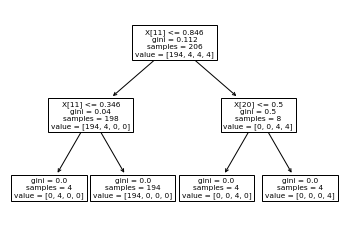

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
tree.plot_tree(dt_clf_Xa) 

In [96]:
_data_Xa = tree.export_graphviz(dt_clf_Xa, out_file="None", filled=True, rounded=True,special_characters=True)

In [97]:
import graphviz 
from graphviz import Source
_data_Xa = tree.export_graphviz(dt_clf_Xa, out_file=None)
graph = graphviz.Source(_data_Xa) 
graph.render("name of file",view = True)
import pydotplus
from IPython.display import Image 

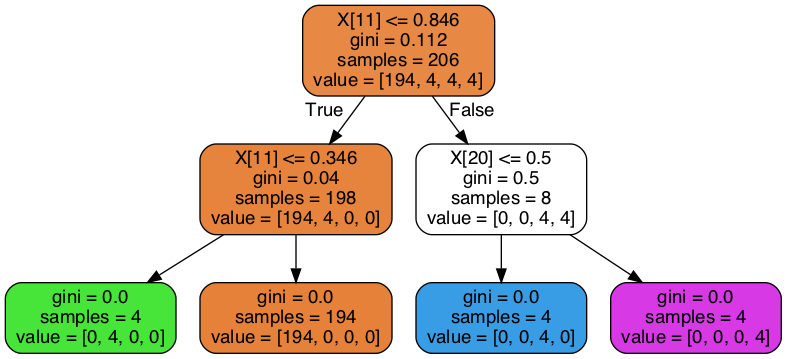

In [98]:
import pydotplus
_data_Xa = tree.export_graphviz(dt_clf_Xa, out_file=None, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(_data_Xa)  

Image(graph.create_png())

>1, train: 0.970, test: 0.929
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000


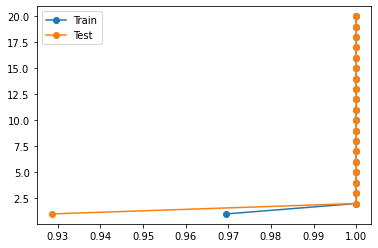

In [99]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# split into train test sets
Xa_train, Xa_test, Ya_train, Ya_test = train_test_split(Xa, Ya, test_size=0.2)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(Xa_train, Ya_train)
	# evaluate on the train dataset
	train_yhat = model.predict(Xa_train)
	train_acc = accuracy_score(Ya_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(Xa_test)
	test_acc = accuracy_score(Ya_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(train_scores, values, '-o', label='Train')
pyplot.plot(test_scores, values, '-o', label='Test')
pyplot.legend()
pyplot.show()

[Text(558.0, 611.55, 'X[9] <= 1.5\nentropy = 0.413\nsamples = 206\nvalue = [194, 4, 4, 4]'),
 Text(279.0, 203.85000000000002, 'entropy = 1.116\nsamples = 54\nvalue = [42, 4, 4, 4]'),
 Text(837.0, 203.85000000000002, 'entropy = 0.0\nsamples = 152\nvalue = [152, 0, 0, 0]')]

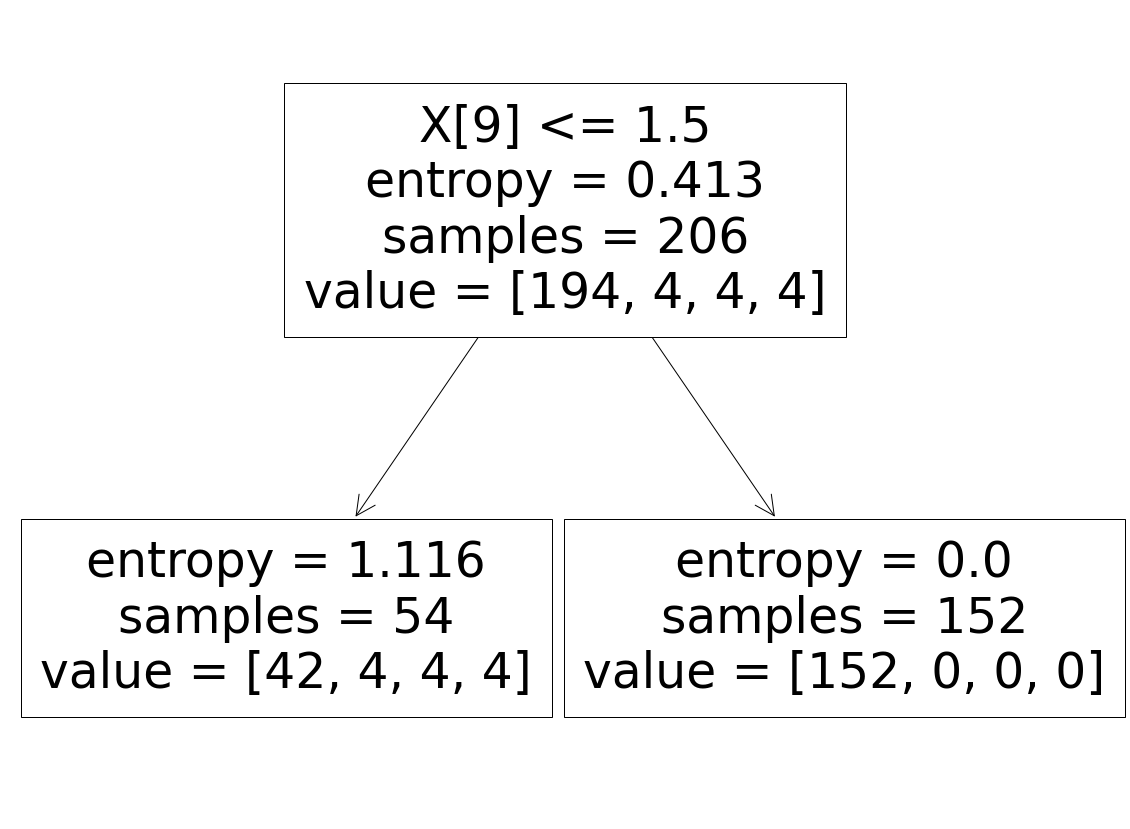

In [100]:
#CART Model
from sklearn.tree import DecisionTreeClassifier, plot_tree
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=50)
DecisionTree.fit(Xa,Ya)
plt.figure(figsize=(20,15))
plot_tree(DecisionTree)

In [101]:
DecisionTree.fit(Xa_train, Ya_train)
Ypred=DecisionTree.predict(Xa_test)
missclf_rate= 1-metrics.accuracy_score(Ya_test, Ypred)
missclf_rate
score=metrics.accuracy_score(Ya_test, Ypred)
score

0.9047619047619048

In [102]:
#random forest model
ntrees=[]
miss_clf_rate=[]
for i in range (1,50):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(Xa_train, Ya_train)
    Ypred_dt=rf.predict(Xa_test)
    ntrees.append(i)
    rate=1-metrics.accuracy_score(Ya_test, Ypred)
    miss_clf_rate.append(rate)

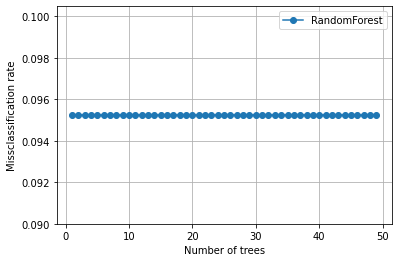

In [103]:
plt.figure()#(figsize=(20,10))
plt.plot(ntrees, miss_clf_rate, '-o', label='RandomForest')
plt.xlabel('Number of trees')
plt.ylabel('Missclassification rate')
plt.legend()
plt.grid()

>1, train: 0.970, test: 0.929
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000
>21, train: 1.000, test: 1.000
>22, train: 1.000, test: 1.000
>23, train: 1.000, test: 1.000
>24, train: 1.000, test: 1.000
>25, train: 1.000, test: 1.000
>26, train: 1.000, test: 1.000
>27, train: 1.000, test: 1.000
>28, train: 1.000, test: 1.000
>29, train: 1.000, test: 1.000
>30, train: 1.000, test: 1.000
>31, train: 1.000, test: 1.000
>32, train: 1.000, test: 1.000
>33, train: 1.000

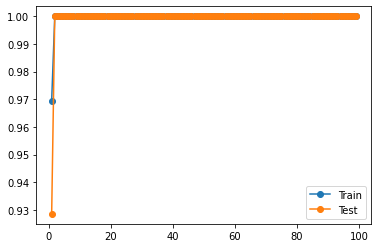

In [104]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset

# split into train test sets
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
Xa_train, Xa_test, Ya_train, Ya_test = train_test_split(Xa, Ya, test_size=0.2, random_state=42)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 100)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(Xa_train, Ya_train)
	# evaluate on the train dataset
	train_yhat = model.predict(Xa_train)
	train_acc = accuracy_score(Ya_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(Xa_test)
	test_acc = accuracy_score(Ya_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [105]:
Xa_train, Xa_test, Ya_train, Ya_test = train_test_split(Xa, Ya, test_size=0.20, random_state=42)

In [106]:
# Dataset with PCA
import Utilities.mypca as PCA
pca_Xa = PCA.MyPCA()
pca_Xa.fit(Xa_train)
PCA_x_train_Xa = pca_Xa.fit_transform(5, Xa_train)
PCA_x_val_Xa = pca_Xa.fit_transform(5, Xa_test)
print(PCA_x_train_Xa.shape)

(164, 5)


In [107]:
Ya_train.shape


(164,)

In [108]:
Xa_train.shape

(164, 46)

In [109]:
Ya_train.shape

(164,)

In [110]:
mean_x_train_Xa = np.mean(Xa_train)
std_x_train_Xa = np.std(Xa_train)
std = lambda Xa: ((Xa - mean_x_train_Xa)/std_x_train_Xa)
inv_std = lambda Xa: ((Xa*std_x_train_Xa + mean_x_train_Xa))
x_train_std_Xa = std(Xa_train)
x_test_std_Xa = std(Xa_test)

In [111]:
x_train_std_Xa

PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent    Gender  \
144         1.701587  -0.351123          NaN             NaN  0.749603   
84          1.701587  -0.351123          NaN             NaN  0.749603   
98         -0.596245  -0.351123          NaN             NaN  0.749603   
38         -0.596245  -0.351123          NaN             NaN -1.334039   
24         -0.596245  -0.351123          NaN             NaN  0.749603   
..               ...        ...          ...             ...       ...   
106        -0.596245  -0.351123          NaN             NaN  0.749603   
14          1.701587  -0.351123          NaN             NaN -1.334039   
92         -0.596245  -0.351123          NaN             NaN -1.334039   
179        -0.171177  -0.351123          NaN             NaN -1.334039   
102        -0.596245  -0.351123          NaN             NaN  0.749603   

       Height  InsModPump  InsModInjections  PumpType   DiagAge  ...  \
144 -0.221926         NaN               NaN  0.086177 -0.112453  ...   
84  -0.221926         NaN               NaN  0.086177  1.040192  ...   
98  -1.372008         NaN               NaN  0.086177 -0.112453  ...   
38  -0.221926         NaN               NaN  0.086177  1.040192  ...   
24  -0.221926         NaN               NaN  0.086177  1.616515  ...   
..        ...         ...               ...       ...       ...  ...   
106 -0.221926         NaN               NaN  1.560763 -0.688776  ...   
14   3.439739         NaN               NaN  0.086177  1.616515  ...   
92  -0.221926         NaN               NaN  0.086177  1.040192  ...   
179 -0.221926         NaN               NaN  0.086177 -1.265098  ...   
102  0.739935         NaN               NaN  0.086177  0.463869  ...   

     Weight_y  WeightNotAvail  AERelLabData  AEOthRelHx  AEMedProd  \
144  0.023672             NaN      1.158817   -0.340068  -0.383214   
84  -0.337591             NaN      1.158817   -0.340068  -0.383214   
98   0.023672             NaN     -0.862949   -0.340068  -0.383214   
38   0.023672             NaN      1.158817   -0.340068  -0.383214   
24   0.023672             NaN     -0.862949   -0.340068  -0.383214   
..        ...             ...           ...         ...        ...   
106  0.362703             NaN     -0.862949   -0.340068  -0.383214   
14   0.023672             NaN     -0.862949   -0.340068  -0.383214   
92   0.023672             NaN     -0.862949   -0.340068  -0.383214   
179 -0.337591             NaN      1.158817    2.940588   2.609506   
102  0.012556             NaN      1.158817   -0.340068  -0.383214   

     MMAERelStdyTrt  MMAESerious  MMHospDiscRptObtained  \
144       -0.268133     0.596131                    NaN   
84        -0.268133     0.596131                    NaN   
98        -0.268133     0.596131                    NaN   
38        -0.268133     0.596131                    NaN   
24        -0.268133    -1.677484                    NaN   
..              ...          ...                    ...   
106       -0.268133     0.596131                    NaN   
14        -0.268133     0.596131                    NaN   
92        -0.268133     0.596131                    NaN   
179       -0.268133    -1.677484                    NaN   
102       -0.268133     0.596131                    NaN   

     AERelStdyDrugDeviceWhich  MMAERelStdyTrtHighLvl  
144                       NaN                    NaN  
84                        NaN                    NaN  
98                        NaN                    NaN  
38                        NaN                    NaN  
24                        NaN                    NaN  
..                        ...                    ...  
106                       NaN                    NaN  
14                        NaN                    NaN  
92                        NaN                    NaN  
179                       NaN                    NaN  
102                       NaN                    NaN  

[164 rows x 46 columns]

In [112]:
x_test_std_Xa

PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent    Gender  \
15         -0.596245  -0.351123          NaN             NaN  0.749603   
9          -0.596245  -0.351123          NaN             NaN  0.749603   
201         1.701587  -0.351123          NaN             NaN  0.749603   
82          1.701587  -0.351123          NaN             NaN  0.749603   
68          1.701587   2.848001          NaN             NaN  0.749603   
97         -0.596245  -0.351123          NaN             NaN  0.749603   
180        -0.171177  -0.351123          NaN             NaN -1.334039   
163        -0.596245  -0.351123          NaN             NaN -1.334039   
148        -0.596245  -0.351123          NaN             NaN  0.749603   
183        -0.596245  -0.351123          NaN             NaN  0.749603   
101         1.701587  -0.351123          NaN             NaN -1.334039   
165        -0.596245  -0.351123          NaN             NaN -1.334039   
65         -0.596245  -0.351123          NaN             NaN  0.749603   
176        -0.596245  -0.351123          NaN             NaN  0.749603   
73         -0.596245  -0.351123          NaN             NaN  0.749603   
93         -0.596245  -0.351123          NaN             NaN  0.749603   
18         -0.596245  -0.351123          NaN             NaN  0.749603   
154        -0.596245  -0.351123          NaN             NaN  0.749603   
137        -0.596245  -0.351123          NaN             NaN  0.749603   
166        -0.596245  -0.351123          NaN             NaN -1.334039   
60          1.701587  -0.351123          NaN             NaN  0.749603   
147         1.701587   2.848001          NaN             NaN -1.334039   
100         1.701587  -0.351123          NaN             NaN -1.334039   
30          1.701587   2.848001          NaN             NaN  0.749603   
25         -0.596245  -0.351123          NaN             NaN  0.749603   
16         -0.596245  -0.351123          NaN             NaN  0.749603   
174         1.701587  -0.351123          NaN             NaN -1.334039   
184        -0.596245  -0.351123          NaN             NaN  0.749603   
192         1.701587  -0.351123          NaN             NaN -1.334039   
195        -0.596245  -0.351123          NaN             NaN  0.749603   
67         -0.596245  -0.351123          NaN             NaN -1.334039   
122        -0.596245  -0.351123          NaN             NaN -1.334039   
168        -0.596245  -0.351123          NaN             NaN -1.334039   
155        -0.596245  -0.351123          NaN             NaN  0.749603   
113        -0.596245  -0.351123          NaN             NaN  0.749603   
69          1.701587   2.848001          NaN             NaN  0.749603   
112        -0.596245  -0.351123          NaN             NaN  0.749603   
55         -0.596245  -0.351123          NaN             NaN  0.749603   
45          1.701587   2.848001          NaN             NaN  0.749603   
153         1.701587   2.848001          NaN             NaN  0.749603   
118        -0.596245  -0.351123          NaN             NaN -1.334039   
66         -0.596245  -0.351123          NaN             NaN -1.334039   

       Height  InsModPump  InsModInjections  PumpType   DiagAge  ...  \
15   0.739935         NaN               NaN  0.086177  0.463869  ...   
9   -1.372008         NaN               NaN  0.086177 -0.112453  ...   
201 -0.221926         NaN               NaN -1.886321 -0.688776  ...   
82  -0.221926         NaN               NaN  0.086177  1.040192  ...   
68  -0.221926         NaN               NaN  0.086177 -1.265098  ...   
97  -1.372008         NaN               NaN  0.086177 -0.112453  ...   
180 -0.221926         NaN               NaN  0.086177 -1.265098  ...   
163 -0.221926         NaN               NaN  0.086177  1.040192  ...   
148 -0.221926         NaN               NaN  0.086177 -1.265098  ...   
183  0.805253         NaN               NaN -1.886321 -0.112453  ...   
101  3.439739         NaN     

In [113]:
Diab2=DiabScreening_data[['PtID','PreExistMedCond','PtCurrMed','EligCritMet','ExclCritAbsent','Gender','Weight','Height','InsModPump','InsModInjections','PumpType','DiagAge','PEAbnormal','SHMostRecent',
       'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months']]
Diab2

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33         1.000000        0.0            1               1     0.0   
1     137         0.000000        0.0            1               1     1.0   
2     136         0.184987        0.0            1               1     1.0   
3      42         0.000000        0.0            1               1     0.0   
4      37         1.000000        0.0            1               1     1.0   
..    ...              ...        ...          ...             ...     ...   
395    50         0.000000        0.0            1               1     1.0   
396     6         1.000000        0.0            1               1     1.0   
397    57         0.000000        1.0            1               1     0.0   
398    19         1.000000        1.0            1               1     1.0   
399   107         0.000000        0.0            1               1     1.0   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

    PEAbnormal  SHMostRecent  SHSeizComa  SHSeizComaLast12Months  \
0          NaN           0.0           0                0.692308   
1          NaN           0.0           0                0.692308   
2          NaN           1.0           1                1.000000   
3          NaN           0.0           0                0.692308   
4          NaN           0.0           0                0.692308   
..         ...           ...         ...                     ...   
395        0.0           0.0           0                0.692308   
396        0.0           0.0           0                0.692308   
397        NaN           0.0           0                0.692308   
398        NaN           5.0           1                1.000000   
399        NaN           3.0           1                0.000000   

     DKAMostRecent  DKANumLast12Months  
0              1.0                   1  
1              0.0                   0  
2              1.0                   1  
3              0.0                   0  
4              3.0                   0  
..             ...                 ...  
395            0.0                   0  
396            3.0                   0  
397            0.0                   0  
398            4.0                   0  
399            3.0                   0  

[400 rows x 18 columns]

In [114]:
cols2=Diabetes1.columns
cols2

Index(['PreExistMedCond', 'PtCurrMed', 'EligCritMet', 'ExclCritAbsent',
       'Gender', 'Height', 'InsModPump', 'InsModInjections', 'PumpType',
       'DiagAge', 'SHMostRecent', 'SHSeizComa', 'SHSeizComaLast12Months',
       'DKAMostRecent', 'DKANumLast12Months', 'BldPrSys', 'BldPrDia',
       'PEHeartRt', 'FingStkBG', 'MedicalCondition', 'MedicalConditionMM',
       'AEPrEnroll', 'AENotedStdyVisExam', 'AEIntensity', 'AERelStdyTrt',
       'AERelStdyProc', 'AEEffectTrt', 'AESerious', 'AETrt', 'AESurg',
       'AEOthTrt', 'AEOutcome', 'AEConAnomaly', 'AELifeThreat', 'AEHosp',
       'AEDisability', 'AEOther', 'Weight_y', 'WeightNotAvail', 'AERelLabData',
       'AEOthRelHx', 'AEMedProd', 'MMAERelStdyTrt', 'MMAESerious',
       'MMHospDiscRptObtained', 'AERelStdyDrugDeviceWhich',
       'MMAERelStdyTrtHighLvl'],
      dtype='object')

In [115]:
Xa_train.shape

(164, 46)

In [116]:
x_train_std_Xa

PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent    Gender  \
144         1.701587  -0.351123          NaN             NaN  0.749603   
84          1.701587  -0.351123          NaN             NaN  0.749603   
98         -0.596245  -0.351123          NaN             NaN  0.749603   
38         -0.596245  -0.351123          NaN             NaN -1.334039   
24         -0.596245  -0.351123          NaN             NaN  0.749603   
..               ...        ...          ...             ...       ...   
106        -0.596245  -0.351123          NaN             NaN  0.749603   
14          1.701587  -0.351123          NaN             NaN -1.334039   
92         -0.596245  -0.351123          NaN             NaN -1.334039   
179        -0.171177  -0.351123          NaN             NaN -1.334039   
102        -0.596245  -0.351123          NaN             NaN  0.749603   

       Height  InsModPump  InsModInjections  PumpType   DiagAge  ...  \
144 -0.221926         NaN               NaN  0.086177 -0.112453  ...   
84  -0.221926         NaN               NaN  0.086177  1.040192  ...   
98  -1.372008         NaN               NaN  0.086177 -0.112453  ...   
38  -0.221926         NaN               NaN  0.086177  1.040192  ...   
24  -0.221926         NaN               NaN  0.086177  1.616515  ...   
..        ...         ...               ...       ...       ...  ...   
106 -0.221926         NaN               NaN  1.560763 -0.688776  ...   
14   3.439739         NaN               NaN  0.086177  1.616515  ...   
92  -0.221926         NaN               NaN  0.086177  1.040192  ...   
179 -0.221926         NaN               NaN  0.086177 -1.265098  ...   
102  0.739935         NaN               NaN  0.086177  0.463869  ...   

     Weight_y  WeightNotAvail  AERelLabData  AEOthRelHx  AEMedProd  \
144  0.023672             NaN      1.158817   -0.340068  -0.383214   
84  -0.337591             NaN      1.158817   -0.340068  -0.383214   
98   0.023672             NaN     -0.862949   -0.340068  -0.383214   
38   0.023672             NaN      1.158817   -0.340068  -0.383214   
24   0.023672             NaN     -0.862949   -0.340068  -0.383214   
..        ...             ...           ...         ...        ...   
106  0.362703             NaN     -0.862949   -0.340068  -0.383214   
14   0.023672             NaN     -0.862949   -0.340068  -0.383214   
92   0.023672             NaN     -0.862949   -0.340068  -0.383214   
179 -0.337591             NaN      1.158817    2.940588   2.609506   
102  0.012556             NaN      1.158817   -0.340068  -0.383214   

     MMAERelStdyTrt  MMAESerious  MMHospDiscRptObtained  \
144       -0.268133     0.596131                    NaN   
84        -0.268133     0.596131                    NaN   
98        -0.268133     0.596131                    NaN   
38        -0.268133     0.596131                    NaN   
24        -0.268133    -1.677484                    NaN   
..              ...          ...                    ...   
106       -0.268133     0.596131                    NaN   
14        -0.268133     0.596131                    NaN   
92        -0.268133     0.596131                    NaN   
179       -0.268133    -1.677484                    NaN   
102       -0.268133     0.596131                    NaN   

     AERelStdyDrugDeviceWhich  MMAERelStdyTrtHighLvl  
144                       NaN                    NaN  
84                        NaN                    NaN  
98                        NaN                    NaN  
38                        NaN                    NaN  
24                        NaN                    NaN  
..                        ...                    ...  
106                       NaN                    NaN  
14                        NaN                    NaN  
92                        NaN                    NaN  
179                       NaN                    NaN  
102                       NaN                    NaN  

[164 rows x 46 columns]

In [117]:
Ya_test.shape

(42,)

In [118]:
x_test_std_Xa.shape

(42, 46)

In [119]:
cols2.shape

(47,)

In [120]:
trainingdata_Xa = pd.DataFrame(np.hstack((x_train_std_Xa, Ya_train[:,np.newaxis])), columns = cols2)
validationdata_Xa = pd.DataFrame(np.hstack((x_test_std_Xa, Ya_test[:,np.newaxis])), columns = cols2)
trainingdata_Xa.head()

PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent    Gender  \
0         1.701587  -0.351123          NaN             NaN  0.749603   
1         1.701587  -0.351123          NaN             NaN  0.749603   
2        -0.596245  -0.351123          NaN             NaN  0.749603   
3        -0.596245  -0.351123          NaN             NaN -1.334039   
4        -0.596245  -0.351123          NaN             NaN  0.749603   

     Height  InsModPump  InsModInjections  PumpType   DiagAge  ...  Weight_y  \
0 -0.221926         NaN               NaN  0.086177 -0.112453  ...       NaN   
1 -0.221926         NaN               NaN  0.086177  1.040192  ...       NaN   
2 -1.372008         NaN               NaN  0.086177 -0.112453  ...       NaN   
3 -0.221926         NaN               NaN  0.086177  1.040192  ...       NaN   
4 -0.221926         NaN               NaN  0.086177  1.616515  ...       NaN   

   WeightNotAvail  AERelLabData  AEOthRelHx  AEMedProd  MMAERelStdyTrt  \
0        1.158817     -0.340068   -0.383214  -0.268133        0.596131   
1        1.158817     -0.340068   -0.383214  -0.268133        0.596131   
2       -0.862949     -0.340068   -0.383214  -0.268133        0.596131   
3        1.158817     -0.340068   -0.383214  -0.268133        0.596131   
4       -0.862949     -0.340068   -0.383214  -0.268133       -1.677484   

   MMAESerious  MMHospDiscRptObtained  AERelStdyDrugDeviceWhich  \
0          NaN                    NaN                       NaN   
1          NaN                    NaN                       NaN   
2          NaN                    NaN                       NaN   
3          NaN                    NaN                       NaN   
4          NaN                    NaN                       NaN   

   MMAERelStdyTrtHighLvl  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  

[5 rows x 47 columns]

In [121]:
Diabetes1.columns

Index(['PreExistMedCond', 'PtCurrMed', 'EligCritMet', 'ExclCritAbsent',
       'Gender', 'Height', 'InsModPump', 'InsModInjections', 'PumpType',
       'DiagAge', 'SHMostRecent', 'SHSeizComa', 'SHSeizComaLast12Months',
       'DKAMostRecent', 'DKANumLast12Months', 'BldPrSys', 'BldPrDia',
       'PEHeartRt', 'FingStkBG', 'MedicalCondition', 'MedicalConditionMM',
       'AEPrEnroll', 'AENotedStdyVisExam', 'AEIntensity', 'AERelStdyTrt',
       'AERelStdyProc', 'AEEffectTrt', 'AESerious', 'AETrt', 'AESurg',
       'AEOthTrt', 'AEOutcome', 'AEConAnomaly', 'AELifeThreat', 'AEHosp',
       'AEDisability', 'AEOther', 'Weight_y', 'WeightNotAvail', 'AERelLabData',
       'AEOthRelHx', 'AEMedProd', 'MMAERelStdyTrt', 'MMAESerious',
       'MMHospDiscRptObtained', 'AERelStdyDrugDeviceWhich',
       'MMAERelStdyTrtHighLvl'],
      dtype='object')

In [122]:
Diabetes1.shape

(206, 47)

In [123]:
BFE_cols_Xa = ['PreExistMedCond', 'PtCurrMed', 'EligCritMet', 'ExclCritAbsent',
       'Gender','Height', 'InsModPump', 'InsModInjections',
       'PumpType', 'DiagAge', 'SHMostRecent', 
       'SHSeizComaLast12Months', 'DKAMostRecent', 'DKANumLast12Months',
       'BldPrSys', 'BldPrDia', 'PEHeartRt', 'FingStkBG', 'MedicalCondition',
       'MedicalConditionMM', 'AEPrEnroll', 'AENotedStdyVisExam', 'AEIntensity',
       'AERelStdyTrt', 'AERelStdyProc', 'AEEffectTrt', 'AESerious', 'AETrt',
       'AESurg', 'AEOthTrt', 'AEOutcome', 'AEConAnomaly', 'AELifeThreat',
       'AEHosp', 'AEDisability', 'AEOther', 'Weight_y', 'WeightNotAvail',
       'AERelLabData', 'AEOthRelHx', 'AEMedProd', 'MMAERelStdyTrt',
       'MMAESerious', 'MMHospDiscRptObtained', 'AERelStdyDrugDeviceWhich',
       'MMAERelStdyTrtHighLvl']
BFE_x_train_Xa = Diabetes1[BFE_cols_Xa]
BFE_x_val_Xa = validationdata_Xa[BFE_cols_Xa]
print(BFE_x_train_Xa.shape)

(206, 46)


In [124]:
BFE_x_train_Xa

PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0           1.000000          0            1               1       0   
1           1.000000          0            1               1       0   
2           0.000000          1            1               1       0   
3           0.000000          1            1               1       0   
4           0.184987          0            1               1       0   
..               ...        ...          ...             ...     ...   
201         1.000000          0            1               1       1   
202         1.000000          0            1               1       1   
203         0.000000          0            1               1       1   
204         0.000000          0            1               1       1   
205         0.000000          0            1               1       1   

         Height  InsModPump  InsModInjections  PumpType  DiagAge  ...  \
0    115.782243         1.0               1.0  8.000000        1  ...   
1    115.782243         1.0               1.0  8.000000        1  ...   
2    115.782243         1.0               1.0  3.288889        2  ...   
3    115.782243         1.0               1.0  3.288889        2  ...   
4    115.782243         1.0               1.0  3.288889        1  ...   
..          ...         ...               ...       ...      ...  ...   
201  115.782243         1.0               1.0  1.000000        2  ...   
202  115.782243         1.0               1.0  1.000000        2  ...   
203  115.782243         1.0               1.0  3.288889        6  ...   
204  115.782243         1.0               1.0  3.288889        6  ...   
205  115.782243         1.0               1.0  3.288889        6  ...   

      Weight_y  WeightNotAvail  AERelLabData  AEOthRelHx  AEMedProd  \
0    27.063492             1.0           0.0         0.0        0.0   
1    27.063492             1.0           0.0         0.0        0.0   
2    15.000000             1.0           1.0         1.0        1.0   
3    15.000000             1.0           1.0         1.0        1.0   
4    25.000000             1.0           1.0         1.0        1.0   
..         ...             ...           ...         ...        ...   
201  27.063492             1.0           0.0         0.0        0.0   
202  27.063492             1.0           0.0         0.0        0.0   
203  27.063492             1.0           0.0         0.0        0.0   
204  27.063492             1.0           0.0         0.0        0.0   
205  27.063492             1.0           0.0         0.0        0.0   

     MMAERelStdyTrt  MMAESerious  MMHospDiscRptObtained  \
0               0.0          0.0                    0.0   
1               0.0          0.0                    0.0   
2               0.0          1.0                    0.0   
3               0.0          1.0                    0.0   
4               0.0          0.0                    0.0   
..              ...          ...                    ...   
201             0.0          1.0                    0.0   
202             0.0          1.0                    0.0   
203             0.0          0.0                    0.0   
204             0.0          0.0                    0.0   
205             0.0          0.0                    0.0   

     AERelStdyDrugDeviceWhich  MMAERelStdyTrtHighLvl  
0                         0.0                    0.0  
1                         0.0                    0.0  
2                         0.0                    0.0  
3                         0.0                    0.0  
4                         0.0                    0.0  
..                        ...                    ...  
201                       0.0                    0.0  
202                       0.0                    0.0  
203                       0.0                    0.0  
204                       0.0                    0.0  
205                       0.0                    0.0  

[206 rows x 46 columns]

In [125]:
BFE_x_train_Xa=BFE_x_train_Xa.fillna(BFE_x_train_Xa.mean())
BFE_x_train_Xa

PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0           1.000000          0            1               1       0   
1           1.000000          0            1               1       0   
2           0.000000          1            1               1       0   
3           0.000000          1            1               1       0   
4           0.184987          0            1               1       0   
..               ...        ...          ...             ...     ...   
201         1.000000          0            1               1       1   
202         1.000000          0            1               1       1   
203         0.000000          0            1               1       1   
204         0.000000          0            1               1       1   
205         0.000000          0            1               1       1   

         Height  InsModPump  InsModInjections  PumpType  DiagAge  ...  \
0    115.782243         1.0               1.0  8.000000        1  ...   
1    115.782243         1.0               1.0  8.000000        1  ...   
2    115.782243         1.0               1.0  3.288889        2  ...   
3    115.782243         1.0               1.0  3.288889        2  ...   
4    115.782243         1.0               1.0  3.288889        1  ...   
..          ...         ...               ...       ...      ...  ...   
201  115.782243         1.0               1.0  1.000000        2  ...   
202  115.782243         1.0               1.0  1.000000        2  ...   
203  115.782243         1.0               1.0  3.288889        6  ...   
204  115.782243         1.0               1.0  3.288889        6  ...   
205  115.782243         1.0               1.0  3.288889        6  ...   

      Weight_y  WeightNotAvail  AERelLabData  AEOthRelHx  AEMedProd  \
0    27.063492             1.0           0.0         0.0        0.0   
1    27.063492             1.0           0.0         0.0        0.0   
2    15.000000             1.0           1.0         1.0        1.0   
3    15.000000             1.0           1.0         1.0        1.0   
4    25.000000             1.0           1.0         1.0        1.0   
..         ...             ...           ...         ...        ...   
201  27.063492             1.0           0.0         0.0        0.0   
202  27.063492             1.0           0.0         0.0        0.0   
203  27.063492             1.0           0.0         0.0        0.0   
204  27.063492             1.0           0.0         0.0        0.0   
205  27.063492             1.0           0.0         0.0        0.0   

     MMAERelStdyTrt  MMAESerious  MMHospDiscRptObtained  \
0               0.0          0.0                    0.0   
1               0.0          0.0                    0.0   
2               0.0          1.0                    0.0   
3               0.0          1.0                    0.0   
4               0.0          0.0                    0.0   
..              ...          ...                    ...   
201             0.0          1.0                    0.0   
202             0.0          1.0                    0.0   
203             0.0          0.0                    0.0   
204             0.0          0.0                    0.0   
205             0.0          0.0                    0.0   

     AERelStdyDrugDeviceWhich  MMAERelStdyTrtHighLvl  
0                         0.0                    0.0  
1                         0.0                    0.0  
2                         0.0                    0.0  
3                         0.0                    0.0  
4                         0.0                    0.0  
..                        ...                    ...  
201                       0.0                    0.0  
202                       0.0                    0.0  
203                       0.0                    0.0  
204                       0.0                    0.0  
205                       0.0                    0.0  

[206 rows x 46 columns]

In [126]:
from sklearn.svm import SVC
LR_Xa = LogisticRegression()
GB_Xa = GaussianNB() 
KN_Xa = KNeighborsClassifier(n_neighbors=4, p = 2) # 4 Neighbors by euclidian distance.
DT_GINI_Xa = DecisionTreeClassifier(criterion="gini",max_depth=4) # Decision Tree with Gini impurity for quality of split
DT_IG_Xa = DecisionTreeClassifier(criterion="entropy",max_depth=4) # Information gain for quality of split
SV_Xa = SVC() # Support vector machine classifier.

modelnames_Xa = ["Logistic regression","Gaussian Naive Bayes", "4-Neighbors","Decisiontree Gini",
              "Decisiontree Information gain", "Support vector machine"]

models_Xa = zip(modelnames_Xa,[LR_Xa, GB_Xa, KN_Xa, DT_GINI_Xa, DT_IG_Xa, SV_Xa])
results_PCA_Xa = []
results_BFE_Xa = []
results_Xa = []

for name,model in models_Xa:
    kfold = KFold(n_splits=18)
    cv_result_PCA_Xa = cross_val_score(model, PCA_x_train_Xa, Ya_train, cv = kfold,scoring = "accuracy")
    cv_result_BFE_Xa = cross_val_score(model, BFE_x_train_Xa, Ya, cv = kfold,scoring = "accuracy")
   # cv_result_BFE = cross_val_score(model, Xd_train, Yd_train, cv = kfold,scoring = "accuracy")
    cv_result_Xa = cross_val_score(model, Xa_train, Ya_train, cv = kfold,scoring = "accuracy")
    results_PCA_Xa.append(cv_result_PCA_Xa)
    results_BFE_Xa.append(cv_result_BFE_Xa)
    results_Xa.append(cv_result_Xa)

print("PCA")
for name, res in zip(modelnames_Xa, results_PCA_Xa):
    print(name,res.mean())
print()
print("BFE")
for name, res in zip(modelnames_Xa, results_BFE_Xa):
    print(name,res.mean())
print()
print("All Data")
for name, res in zip(modelnames_Xa, results_Xa):
    print(name,res.mean())


PCA
Logistic regression 0.9876543209876544
Gaussian Naive Bayes 1.0
4-Neighbors 0.9512345679012344
Decisiontree Gini 0.9938271604938271
Decisiontree Information gain 1.0
Support vector machine 0.9512345679012344

BFE
Logistic regression 1.0
Gaussian Naive Bayes 1.0
4-Neighbors 0.9419191919191918
Decisiontree Gini 1.0
Decisiontree Information gain 1.0
Support vector machine 0.9419191919191918

All Data
Logistic regression 1.0
Gaussian Naive Bayes 1.0
4-Neighbors 0.9512345679012344
Decisiontree Gini 1.0
Decisiontree Information gain 1.0
Support vector machine 0.9512345679012344


###  Comparing models with K-fold cross validation using accuracy Xd dataset

Before giving the test set a go we train our model on the entire training dataset with some imputing. We also put it into a pipeline to automate the work-flow.

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [128]:
Diabetes2=Diabetes1[['MMAESerious','AEMedProd','AEOthRelHx','AERelLabData','Weight_y','AEOutcome','AEOthTrt','AETrt','AESerious','AEEffectTrt','AEIntensity','AEPrEnroll','MedicalCondition', 'MedicalConditionMM','FingStkBG','PEHeartRt','BldPrSys', 'BldPrDia','DKAMostRecent', 'DKANumLast12Months','SHMostRecent', 'SHSeizComa', 'SHSeizComaLast12Months','PumpType',
       'DiagAge','Gender', 'Height','PtCurrMed','PreExistMedCond','SHSeizComa']]

In [129]:
Yd = Diab1['SHSeizComa']
Xd = Diab1.drop(['SHSeizComa'], axis=1)

In [130]:
#missing_values='NaN'
pipeline = Pipeline([("imputer", SimpleImputer(missing_values = np.nan,
                                          strategy="mean"
                                          )),
                      ("standardizer", StandardScaler()),
                      ("VotingClassifier", model_Xd)])

In [131]:
dt_clf_Xd = DecisionTreeClassifier()
dt_clf_Xd = dt_clf_Xd.fit(Xd,Yd)
print(dt_clf_Xd)

DecisionTreeClassifier()


In [132]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None, splitter='best')

DecisionTreeClassifier()

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
#tree.plot_tree(dt_clf_Xd) 

In [134]:
_data_Xd = tree.export_graphviz(dt_clf_Xd, out_file="None", filled=True, rounded=True,special_characters=True)

In [135]:
import graphviz 
from graphviz import Source
_data_Xd = tree.export_graphviz(dt_clf_Xd, out_file=None)
graph = graphviz.Source(_data_Xd) 
graph.render("name of file",view = True)
import pydotplus
from IPython.display import Image 

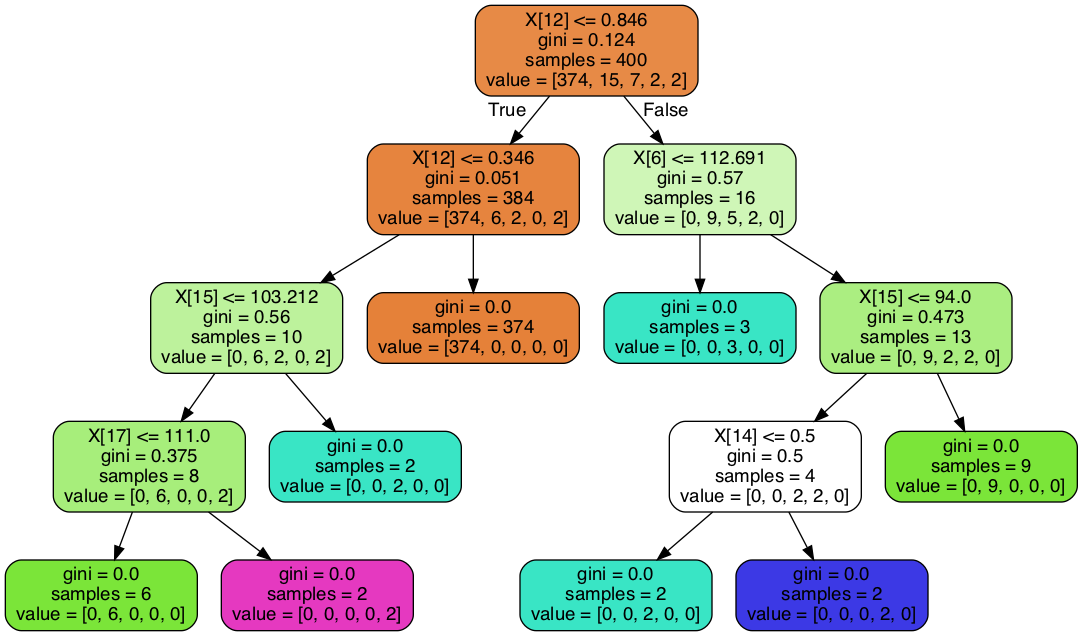

In [136]:
import pydotplus
_data_Xd = tree.export_graphviz(dt_clf_Xd, out_file=None, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(_data_Xd)  

Image(graph.create_png())

>1, train: 0.950, test: 0.988
>2, train: 0.975, test: 0.988
>3, train: 0.988, test: 0.988
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000


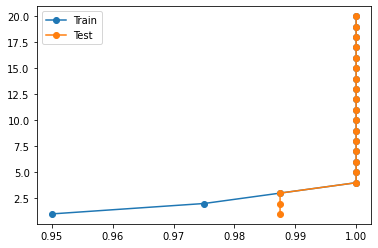

In [137]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# split into train test sets
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(Xd, Yd, test_size=0.2)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(Xd_train, Yd_train)
	# evaluate on the train dataset
	train_yhat = model.predict(Xd_train)
	train_acc = accuracy_score(Yd_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(Xd_test)
	test_acc = accuracy_score(Yd_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(train_scores, values, '-o', label='Train')
pyplot.plot(test_scores, values, '-o', label='Test')
pyplot.legend()
pyplot.show()

[Text(558.0, 611.55, 'X[11] <= 0.5\nentropy = 0.447\nsamples = 400\nvalue = [374, 15, 7, 2, 2]'),
 Text(279.0, 203.85000000000002, 'entropy = 0.0\nsamples = 344\nvalue = [344, 0, 0, 0, 0]'),
 Text(837.0, 203.85000000000002, 'entropy = 1.71\nsamples = 56\nvalue = [30, 15, 7, 2, 2]')]

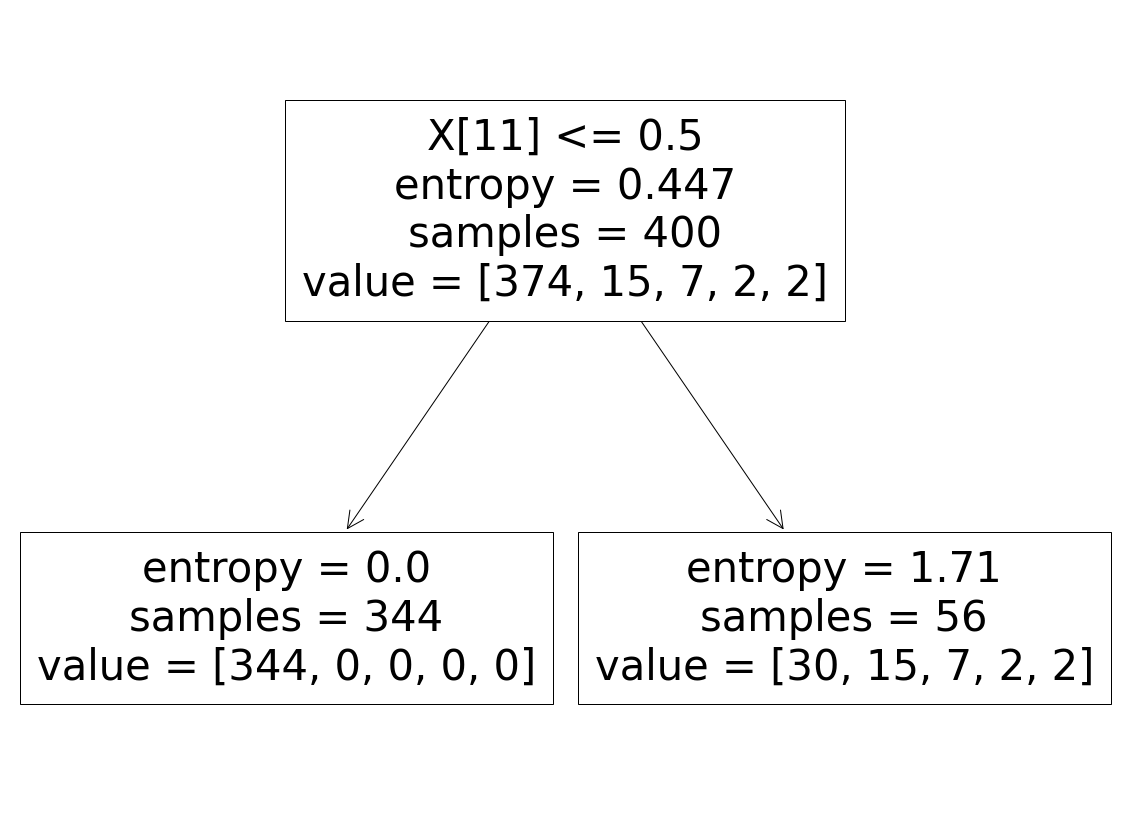

In [138]:
#CART Model
from sklearn.tree import DecisionTreeClassifier, plot_tree
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=50)
DecisionTree.fit(Xd,Yd)
plt.figure(figsize=(20,15))
plot_tree(DecisionTree)

In [139]:
DecisionTree.fit(Xd_train, Yd_train)
Ypred=DecisionTree.predict(Xd_test)
missclf_rate= 1-metrics.accuracy_score(Yd_test, Ypred)
missclf_rate
score_Xd=metrics.accuracy_score(Yd_test, Ypred)
score_Xd

0.9625

In [140]:
#random forest model
ntrees=[]
miss_clf_rate=[]
for i in range (1,50):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(Xd_train, Yd_train)
    Ypred_dt=rf.predict(Xd_test)
    ntrees.append(i)
    rate=1-metrics.accuracy_score(Yd_test, Ypred)
    miss_clf_rate.append(rate)

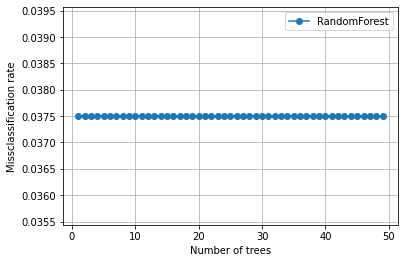

In [141]:
plt.figure()#(figsize=(20,10))
plt.plot(ntrees, miss_clf_rate, '-o', label='RandomForest')
plt.xlabel('Number of trees')
plt.ylabel('Missclassification rate')
plt.legend()
plt.grid()

>1, train: 0.956, test: 0.963
>2, train: 0.978, test: 0.975
>3, train: 0.994, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000
>21, train: 1.000, test: 1.000
>22, train: 1.000, test: 1.000
>23, train: 1.000, test: 1.000
>24, train: 1.000, test: 1.000
>25, train: 1.000, test: 1.000
>26, train: 1.000, test: 1.000
>27, train: 1.000, test: 1.000
>28, train: 1.000, test: 1.000
>29, train: 1.000, test: 1.000
>30, train: 1.000, test: 1.000
>31, train: 1.000, test: 1.000
>32, train: 1.000, test: 1.000
>33, train: 1.000

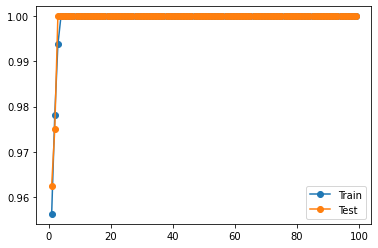

In [142]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset

# split into train test sets
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(Xd, Yd, test_size=0.2, random_state=42)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 100)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(Xd_train, Yd_train)
	# evaluate on the train dataset
	train_yhat = model.predict(Xd_train)
	train_acc = accuracy_score(Yd_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(Xd_test)
	test_acc = accuracy_score(Yd_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [143]:
# Dataset with PCA
import Utilities.mypca as PCA
pca_Xd = PCA.MyPCA()
pca_Xd.fit(Xd_train)
PCA_x_train_Xd = pca_Xd.fit_transform(5, Xd_train)
PCA_x_val_Xd = pca_Xd.fit_transform(5, Xd_test)
print(PCA_x_train_Xd.shape)

(320, 5)


In [144]:
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(Xd, Yd, test_size=0.20, random_state=42)

In [145]:
Xd_test.shape

(80, 19)

In [146]:
Xd_train.shape

(320, 19)

In [147]:
Yd_train.shape

(320,)

In [148]:
mean_x_train_Xd = np.mean(Xd_train)
std_x_train_Xd = np.std(Xd_train)
std = lambda Xd: ((Xd - mean_x_train_Xd)/std_x_train_Xd)
inv_std = lambda Xd: ((Xd*std_x_train_Xd + mean_x_train_Xd))
x_train_std_Xd = std(Xd_train)
x_test_std_Xd = std(Xd_test)

In [149]:
x_train_std_Xd

PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent    Gender  \
3          -0.514563  -0.383345          NaN             NaN -1.018929   
18          2.107010  -0.383345          NaN             NaN -1.018929   
202         2.107010   2.608616          NaN             NaN  0.981423   
250        -0.514563   2.608616          NaN             NaN -1.018929   
274        -0.514563  -0.383345          NaN             NaN -1.018929   
..               ...        ...          ...             ...       ...   
71         -0.514563  -0.383345          NaN             NaN -1.018929   
106        -0.514563  -0.383345          NaN             NaN -1.018929   
270        -0.029607  -0.383345          NaN             NaN  0.981423   
348        -0.514563  -0.383345          NaN             NaN  0.981423   
102        -0.514563  -0.383345          NaN             NaN  0.981423   

       Weight    Height  InsModPump  InsModInjections  PumpType   DiagAge  \
3   -0.013493 -0.076820         NaN               NaN -1.640211  0.575570   
18   3.894382  2.907210         NaN               NaN  0.044888  1.741281   
202  2.053876  1.558717         NaN               NaN -0.167794  0.575570   
250 -0.013493 -0.076820         NaN               NaN  0.044888 -0.007286   
274 -0.013493 -0.076820         NaN               NaN  2.040832 -1.172997   
..        ...       ...         ...               ...       ...       ...   
71  -0.013493 -0.076820         NaN               NaN  0.044888 -0.590141   
106 -0.359233  1.079647         NaN               NaN -1.640211  0.575570   
270 -0.013493 -0.076820         NaN               NaN -1.640211 -1.172997   
348 -0.013493 -0.076820         NaN               NaN  4.249458 -1.172997   
102 -0.013493 -0.076820         NaN               NaN -0.167794 -0.007286   

     SHMostRecent  SHSeizComaLast12Months  DKAMostRecent  DKANumLast12Months  \
3       -0.347791                0.004355      -0.936124           -0.516821   
18      -0.347791                0.004355      -0.936124           -0.516821   
202     -0.347791                0.004355      -0.936124           -0.516821   
250     -0.347791                0.004355       0.143370            1.748697   
274     -0.347791                0.004355      -0.936124           -0.516821   
..            ...                     ...            ...                 ...   
71      -0.347791                0.004355      -0.936124           -0.516821   
106      0.619975                1.862453      -0.936124           -0.516821   
270     -0.347791                0.004355       0.683118           -0.516821   
348     -0.347791                0.004355      -0.936124           -0.516821   
102     -0.347791                0.004355       0.143370            1.748697   

     BldPrSys  BldPrDia  PEHeartRt  FingStkBG  
3    0.563593  1.330830  -0.521341  -2.275129  
18  -1.310796 -0.841032  -0.454289  -0.017942  
202 -0.097956  0.244899  -0.722494  -1.491814  
250  1.225142  1.330830  -3.136334   1.184512  
274 -0.051194 -0.062337   0.059554  -0.017942  
..        ...       ...        ...        ...  
71  -0.649246 -0.705291  -1.393005  -0.017942  
106 -0.649246 -0.569549  -1.728260  -0.017942  
270  1.445659 -0.026584   1.020835  -0.017942  
348  1.555917  0.244899   2.227755  -0.300522  
102 -0.649246  0.244899  -0.320187   2.832737  

[320 rows x 19 columns]

In [150]:
x_test_std_Xd

PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent    Gender  \
209        -0.514563  -0.383345          NaN             NaN  0.981423   
280        -0.514563   2.608616          NaN             NaN  0.981423   
33         -0.514563  -0.383345          NaN             NaN -1.018929   
210        -0.514563  -0.383345          NaN             NaN -1.018929   
93         -0.514563  -0.383345          NaN             NaN -1.018929   
..               ...        ...          ...             ...       ...   
246        -0.514563  -0.383345          NaN             NaN  0.981423   
227         2.107010  -0.383345          NaN             NaN  0.981423   
369        -0.514563  -0.383345          NaN             NaN  0.981423   
176         2.107010  -0.383345          NaN             NaN  0.981423   
289        -0.514563   2.608616          NaN             NaN  0.981423   

       Weight     Height  InsModPump  InsModInjections  PumpType   DiagAge  \
209 -0.013493  -0.076820         NaN               NaN  0.044888 -0.590141   
280 -0.013493  -0.076820         NaN               NaN  0.044888 -0.007286   
33  -1.197685  -0.215616         NaN               NaN  0.044888  0.575570   
210 -0.013493  -0.076820         NaN               NaN  0.044888 -0.590141   
93  -0.013493  -0.076820         NaN               NaN  0.044888  1.158426   
..        ...        ...         ...               ...       ...       ...   
246 -1.197685  -1.918976         NaN               NaN  0.044888 -0.590141   
227  2.933228 -13.079532         NaN               NaN  0.044888 -1.172997   
369 -0.013493  -0.076820         NaN               NaN  0.044888  1.741281   
176 -1.115885  -2.362559         NaN               NaN  0.044888 -0.590141   
289 -0.013493  -0.076820         NaN               NaN  0.044888 -0.590141   

     SHMostRecent  SHSeizComaLast12Months  DKAMostRecent  DKANumLast12Months  \
209     -0.347791                0.004355      -0.936124           -0.516821   
280     -0.347791                0.004355       0.683118           -0.516821   
33      -0.347791                0.004355       1.762612            1.748697   
210     -0.347791                0.004355      -0.936124           -0.516821   
93      -0.347791                0.004355       0.143370            1.748697   
..            ...                     ...            ...                 ...   
246     -0.347791                0.004355       0.683118           -0.516821   
227     -0.347791                0.004355       0.683118           -0.516821   
369     -0.347791                0.004355      -0.936124           -0.516821   
176     -0.347791                0.004355      -0.936124           -0.516821   
289     -0.347791                0.004355       0.683118           -0.516821   

     BldPrSys  BldPrDia  PEHeartRt  FingStkBG  
209 -0.208214  0.380640  -0.588392  -0.017942  
280 -0.051194 -0.062337   0.059554  -0.017942  
33  -1.310796 -1.112515   2.361857  -0.017942  
210 -0.649246 -0.705291  -1.393005  -0.017942  
93  -0.051194 -0.062337   0.059554  -0.017942  
..        ...       ...        ...        ...  
246 -1.421054 -0.433808   1.423142   0.792855  
227 -0.208214 -0.569549   0.059554  -0.017942  
369  1.335401  0.516382   0.350324  -0.017942  
176  0.453335  1.195088  -0.990698  -0.017942  
289 -1.310796 -0.162325  -0.990698  -0.017942  

[80 rows x 19 columns]

In [151]:
Diab2=DiabScreening_data[['PtID','PreExistMedCond','PtCurrMed','EligCritMet','ExclCritAbsent','Gender','Weight','Height','InsModPump','InsModInjections','PumpType','DiagAge','PEAbnormal','SHMostRecent',
       'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months']]
Diab2

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33         1.000000        0.0            1               1     0.0   
1     137         0.000000        0.0            1               1     1.0   
2     136         0.184987        0.0            1               1     1.0   
3      42         0.000000        0.0            1               1     0.0   
4      37         1.000000        0.0            1               1     1.0   
..    ...              ...        ...          ...             ...     ...   
395    50         0.000000        0.0            1               1     1.0   
396     6         1.000000        0.0            1               1     1.0   
397    57         0.000000        1.0            1               1     0.0   
398    19         1.000000        1.0            1               1     1.0   
399   107         0.000000        0.0            1               1     1.0   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

    PEAbnormal  SHMostRecent  SHSeizComa  SHSeizComaLast12Months  \
0          NaN           0.0           0                0.692308   
1          NaN           0.0           0                0.692308   
2          NaN           1.0           1                1.000000   
3          NaN           0.0           0                0.692308   
4          NaN           0.0           0                0.692308   
..         ...           ...         ...                     ...   
395        0.0           0.0           0                0.692308   
396        0.0           0.0           0                0.692308   
397        NaN           0.0           0                0.692308   
398        NaN           5.0           1                1.000000   
399        NaN           3.0           1                0.000000   

     DKAMostRecent  DKANumLast12Months  
0              1.0                   1  
1              0.0                   0  
2              1.0                   1  
3              0.0                   0  
4              3.0                   0  
..             ...                 ...  
395            0.0                   0  
396            3.0                   0  
397            0.0                   0  
398            4.0                   0  
399            3.0                   0  

[400 rows x 18 columns]

In [152]:
cols1=Diab3.columns
cols1

Index(['PreExistMedCond', 'PtCurrMed', 'EligCritMet', 'ExclCritAbsent',
       'Gender', 'Weight', 'Height', 'InsModPump', 'InsModInjections',
       'PumpType', 'DiagAge', 'SHMostRecent', 'SHSeizComa',
       'SHSeizComaLast12Months', 'DKAMostRecent', 'DKANumLast12Months',
       'BldPrSys', 'BldPrDia', 'PEHeartRt', 'FingStkBG'],
      dtype='object')

In [153]:
trainingdata_Xd = pd.DataFrame(np.hstack((x_train_std_Xd, Yd_train[:,np.newaxis])), columns = cols1)
validationdata_Xd = pd.DataFrame(np.hstack((x_test_std_Xd, Yd_test[:,np.newaxis])), columns = cols1)
trainingdata_Xd.head()

PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent    Gender  \
0        -0.514563  -0.383345          NaN             NaN -1.018929   
1         2.107010  -0.383345          NaN             NaN -1.018929   
2         2.107010   2.608616          NaN             NaN  0.981423   
3        -0.514563   2.608616          NaN             NaN -1.018929   
4        -0.514563  -0.383345          NaN             NaN -1.018929   

     Weight    Height  InsModPump  InsModInjections  PumpType   DiagAge  \
0 -0.013493 -0.076820         NaN               NaN -1.640211  0.575570   
1  3.894382  2.907210         NaN               NaN  0.044888  1.741281   
2  2.053876  1.558717         NaN               NaN -0.167794  0.575570   
3 -0.013493 -0.076820         NaN               NaN  0.044888 -0.007286   
4 -0.013493 -0.076820         NaN               NaN  2.040832 -1.172997   

   SHMostRecent  SHSeizComa  SHSeizComaLast12Months  DKAMostRecent  \
0     -0.347791    0.004355               -0.936124      -0.516821   
1     -0.347791    0.004355               -0.936124      -0.516821   
2     -0.347791    0.004355               -0.936124      -0.516821   
3     -0.347791    0.004355                0.143370       1.748697   
4     -0.347791    0.004355               -0.936124      -0.516821   

   DKANumLast12Months  BldPrSys  BldPrDia  PEHeartRt  FingStkBG  
0            0.563593  1.330830 -0.521341  -2.275129        0.0  
1           -1.310796 -0.841032 -0.454289  -0.017942        0.0  
2           -0.097956  0.244899 -0.722494  -1.491814        0.0  
3            1.225142  1.330830 -3.136334   1.184512        0.0  
4           -0.051194 -0.062337  0.059554  -0.017942        0.0

In [154]:
BFE_cols_Xd = ['PreExistMedCond', 'PtCurrMed', 'EligCritMet', 'ExclCritAbsent',
       'Gender', 'Weight', 'Height', 'InsModPump', 'InsModInjections',
       'PumpType', 'DiagAge', 'SHMostRecent', 
       'SHSeizComaLast12Months', 'DKAMostRecent', 'DKANumLast12Months',
       'BldPrSys', 'BldPrDia', 'PEHeartRt', 'FingStkBG']
BFE_x_train_Xd = Diab3[BFE_cols_Xd]
BFE_x_val_Xd = validationdata_Xd[BFE_cols_Xd]
print(BFE_x_train_Xd.shape)

(400, 19)


In [155]:
BFE_x_train_Xd

PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0           1.000000          0            1               1       0   
1           0.000000          0            1               1       1   
2           0.184987          0            1               1       1   
3           0.000000          0            1               1       0   
4           1.000000          0            1               1       1   
..               ...        ...          ...             ...     ...   
395         0.000000          0            1               1       1   
396         1.000000          0            1               1       1   
397         0.000000          1            1               1       0   
398         1.000000          1            1               1       1   
399         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

     SHMostRecent  SHSeizComaLast12Months  DKAMostRecent  DKANumLast12Months  \
0               0                0.692308            1.0                   1   
1               0                0.692308            0.0                   0   
2               1                1.000000            1.0                   1   
3               0                0.692308            0.0                   0   
4               0                0.692308            3.0                   0   
..            ...                     ...            ...                 ...   
395             0                0.692308            0.0                   0   
396             0                0.692308            3.0                   0   
397             0                0.692308            0.0                   0   
398             5                1.000000            4.0                   0   
399             3                0.000000            3.0                   0   

       BldPrSys   BldPrDia   PEHeartRt  FingStkBG  
0     83.000000  51.000000   81.000000    160.000  
1     95.000000  67.000000   75.000000    247.316  
2    103.000000  61.000000   66.000000    247.316  
3    107.000000  73.000000   85.000000    109.000  
4    109.000000  69.000000  104.000000    267.000  
..          ...        ...         ...        ...  
395   90.000000  57.000000   86.000000    247.316  
396   88.000000  64.000000   78.000000    247.316  
397  100.000000  56.000000   82.000000    131.000  
398  110.000000  68.000000  103.000000    247.316  
399  101.424107  62.736607   93.663462    247.316  

[400 rows x 19 columns]

In [156]:
BFE_x_val_Xd=BFE_x_val_Xd.fillna(BFE_x_val_Xd.mean())
BFE_x_val_Xd
BFE_x_val_Xd=BFE_x_val_Xd.fillna(0)

In [157]:
BFE_x_train_Xd=BFE_x_train_Xd.fillna(BFE_x_train_Xd.mean())
BFE_x_train_Xd


PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0           1.000000          0            1               1       0   
1           0.000000          0            1               1       1   
2           0.184987          0            1               1       1   
3           0.000000          0            1               1       0   
4           1.000000          0            1               1       1   
..               ...        ...          ...             ...     ...   
395         0.000000          0            1               1       1   
396         1.000000          0            1               1       1   
397         0.000000          1            1               1       0   
398         1.000000          1            1               1       1   
399         0.000000          0            1               1       1   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

     SHMostRecent  SHSeizComaLast12Months  DKAMostRecent  DKANumLast12Months  \
0               0                0.692308            1.0                   1   
1               0                0.692308            0.0                   0   
2               1                1.000000            1.0                   1   
3               0                0.692308            0.0                   0   
4               0                0.692308            3.0                   0   
..            ...                     ...            ...                 ...   
395             0                0.692308            0.0                   0   
396             0                0.692308            3.0                   0   
397             0                0.692308            0.0                   0   
398             5                1.000000            4.0                   0   
399             3                0.000000            3.0                   0   

       BldPrSys   BldPrDia   PEHeartRt  FingStkBG  
0     83.000000  51.000000   81.000000    160.000  
1     95.000000  67.000000   75.000000    247.316  
2    103.000000  61.000000   66.000000    247.316  
3    107.000000  73.000000   85.000000    109.000  
4    109.000000  69.000000  104.000000    267.000  
..          ...        ...         ...        ...  
395   90.000000  57.000000   86.000000    247.316  
396   88.000000  64.000000   78.000000    247.316  
397  100.000000  56.000000   82.000000    131.000  
398  110.000000  68.000000  103.000000    247.316  
399  101.424107  62.736607   93.663462    247.316  

[400 rows x 19 columns]

In [158]:
from sklearn.svm import SVC
LR_Xd = LogisticRegression()
GB_Xd = GaussianNB() 
KN_Xd = KNeighborsClassifier(n_neighbors=4, p = 2) # 4 Neighbors by euclidian distance.
DT_GINI_Xd = DecisionTreeClassifier(criterion="gini",max_depth=4) # Decision Tree with Gini impurity for quality of split
DT_IG_Xd = DecisionTreeClassifier(criterion="entropy",max_depth=4) # Information gain for quality of split
SV_Xd = SVC() # Support vector machine classifier.

modelnames_Xd = ["Logistic regression","Gaussian Naive Bayes", "4-Neighbors","Decisiontree Gini",
              "Decisiontree Information gain", "Support vector machine"]

models_Xd = zip(modelnames_Xd,[LR_Xd, GB_Xd, KN_Xd, DT_GINI_Xd, DT_IG_Xd, SV_Xd])
results_PCA_Xd = []
results_BFE_Xd = []
results_Xd = []

for name,model in models_Xd:
    kfold = KFold(n_splits=18)
    cv_result_PCA_Xd = cross_val_score(model, PCA_x_train_Xd, Yd_train, cv = kfold,scoring = "accuracy")
    cv_result_BFE_Xd = cross_val_score(model, BFE_x_train_Xd, Yd, cv = kfold,scoring = "accuracy")
   # cv_result_BFE = cross_val_score(model, Xd_train, Yd_train, cv = kfold,scoring = "accuracy")
    cv_result_Xd = cross_val_score(model, Xd_train, Yd_train, cv = kfold,scoring = "accuracy")
    results_PCA_Xd.append(cv_result_PCA_Xd)
    results_BFE_Xd.append(cv_result_BFE_Xd)
    results_Xd.append(cv_result_Xd)

print("PCA")
for name, res in zip(modelnames_Xd, results_PCA_Xd):
    print(name,res.mean())
print()
print("BFE")
for name, res in zip(modelnames_Xd, results_BFE_Xd):
    print(name,res.mean())
print()
print("All Data")
for name, res in zip(modelnames_Xd, results_Xd):
    print(name,res.mean())


PCA
Logistic regression 0.9308278867102396
Gaussian Naive Bayes 0.6844589687726942
4-Neighbors 0.9244734931009442
Decisiontree Gini 0.9531590413943355
Decisiontree Information gain 0.9219317356572257
Support vector machine 0.9308278867102396

BFE
Logistic regression 0.9348924022837066
Gaussian Naive Bayes 0.8975625823451909
4-Neighbors 0.9250109793588055
Decisiontree Gini 1.0
Decisiontree Information gain 0.9873737373737375
Support vector machine 0.9348924022837066

All Data
Logistic regression 0.9400871459694989
Gaussian Naive Bayes 0.9221132897603486
4-Neighbors 0.9213870733478576
Decisiontree Gini 0.9938271604938271
Decisiontree Information gain 0.9780319535221496
Support vector machine 0.9308278867102396


Text(0.5, 1.0, 'Raw data')

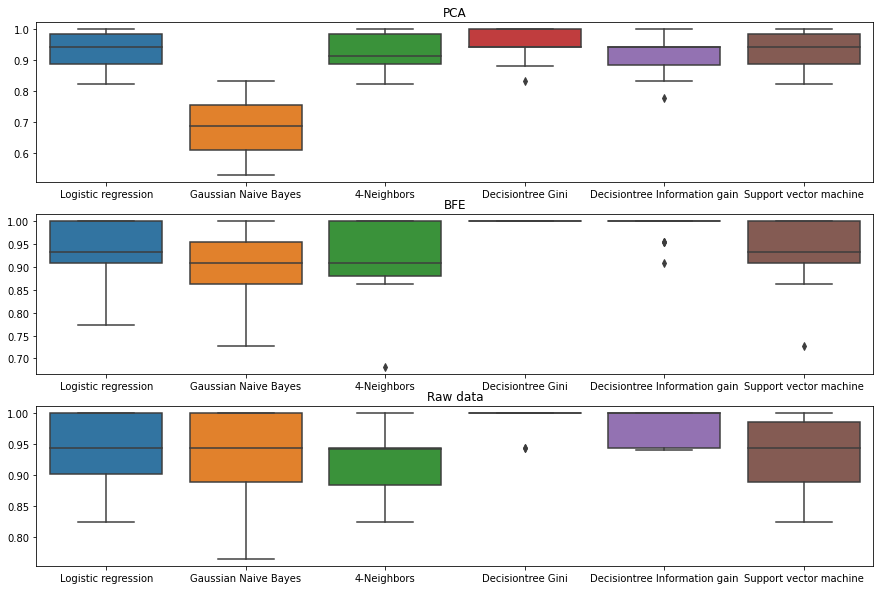

In [159]:
f, ax = plt.subplots(figsize=(15,10))
plt.subplot(3, 1, 1)
ax = sns.boxplot(data=results_PCA_Xd)
ax.set_title("PCA")
ax.set_xticklabels(modelnames_Xd)

plt.subplot(3, 1, 2)
ax = sns.boxplot(data=results_BFE_Xd)
ax.set_title("BFE")
ax.set_xticklabels(modelnames_Xd)

plt.subplot(3, 1, 3)
ax = sns.boxplot(data=results_Xd)
ax.set_xticklabels(modelnames_Xd)
ax.set_title("Raw data")

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [161]:
Diabetes2=Diabetes1[['MMAESerious','AEMedProd','AEOthRelHx','AERelLabData','Weight_y','AEOutcome','AEOthTrt','AETrt','AESerious','AEEffectTrt','AEIntensity','AEPrEnroll','MedicalCondition', 'MedicalConditionMM','FingStkBG','PEHeartRt','BldPrSys', 'BldPrDia','DKAMostRecent', 'DKANumLast12Months','SHMostRecent', 'SHSeizComa', 'SHSeizComaLast12Months','PumpType',
       'DiagAge','Gender', 'Height','PtCurrMed','PreExistMedCond']]

In [162]:
Diabetes2.shape

(206, 29)

In [163]:
Diabetes2.columns

Index(['MMAESerious', 'AEMedProd', 'AEOthRelHx', 'AERelLabData', 'Weight_y',
       'AEOutcome', 'AEOthTrt', 'AETrt', 'AESerious', 'AEEffectTrt',
       'AEIntensity', 'AEPrEnroll', 'MedicalCondition', 'MedicalConditionMM',
       'FingStkBG', 'PEHeartRt', 'BldPrSys', 'BldPrDia', 'DKAMostRecent',
       'DKANumLast12Months', 'SHMostRecent', 'SHSeizComa',
       'SHSeizComaLast12Months', 'PumpType', 'DiagAge', 'Gender', 'Height',
       'PtCurrMed', 'PreExistMedCond'],
      dtype='object')

In [164]:
Diabetes3=pd.DataFrame(Diabetes2)

In [165]:
cols4=Diabetes2.columns

In [166]:
Ym = Diabetes3[['SHSeizComa']]

Xm = Diabetes3[['MMAESerious','AEMedProd','AEOthRelHx','AERelLabData','Weight_y','AEOutcome','AEOthTrt','AETrt','AESerious','AEEffectTrt','AEIntensity','AEPrEnroll','MedicalCondition', 'MedicalConditionMM','FingStkBG','PEHeartRt','BldPrSys', 'BldPrDia','DKAMostRecent', 'DKANumLast12Months','SHMostRecent', 'SHSeizComaLast12Months','PumpType',
       'DiagAge','Gender', 'Height','PtCurrMed','PreExistMedCond']]
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm, Ym, test_size=0.2)

In [167]:
Xm_train.shape

(164, 28)

In [168]:
Ym_train.shape

(164, 1)

In [169]:
Ym = Diabetes3['SHSeizComa']

In [170]:
Ym.shape

(206,)

In [171]:
lm_logistic_Xm = LogisticRegression(random_state=0,max_iter=200)
model_logistic_Xm = lm_logistic_Xm.fit(Xm_train, Ym_train.values.ravel())
model_logistic_Xm
model_logistic_Xm.score(Xm_test, Ym_test)
pred_proba_df_Xm = pd.DataFrame(model_logistic_Xm.predict_proba(Xm_test))
threshold_list_Xm = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list_Xm:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = np.array(pred_proba_df_Xm.iloc[:,1].apply(lambda x: 1 if x>i else 0))
    test_accuracy_Xm = metrics.accuracy_score(np.array(Ym_test), y_test_pred)
    print('Our testing accuracy is {}'.format(test_accuracy_Xm))


******** For i = 0.05 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.1 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.15 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.2 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.25 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.3 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.35 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.4 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.45 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.5 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.55 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.6 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.65 ******
Our testing accuracy is 0.9761904761904762

******** For i = 0.7 ******
Our testing accuracy is 0.97

In [172]:
#Deep learing model

In [173]:
Xm.columns

Index(['MMAESerious', 'AEMedProd', 'AEOthRelHx', 'AERelLabData', 'Weight_y',
       'AEOutcome', 'AEOthTrt', 'AETrt', 'AESerious', 'AEEffectTrt',
       'AEIntensity', 'AEPrEnroll', 'MedicalCondition', 'MedicalConditionMM',
       'FingStkBG', 'PEHeartRt', 'BldPrSys', 'BldPrDia', 'DKAMostRecent',
       'DKANumLast12Months', 'SHMostRecent', 'SHSeizComaLast12Months',
       'PumpType', 'DiagAge', 'Gender', 'Height', 'PtCurrMed',
       'PreExistMedCond'],
      dtype='object')

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import math
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from skmultilearn.adapt import MLkNN

In [175]:
model_Xm = Sequential()
model_Xm.add(Dense(12, input_dim=28, activation='relu'))
model_Xm.add(Dense(10, activation='relu'))
model_Xm.add(Dense(1, activation='sigmoid'))

model_Xm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model_Xm.fit(Xm_train, Ym_train, epochs=30, batch_size=10)
# evaluate the keras model
_, accuracy = model_Xm.evaluate(Xm_test, Ym_test)
print('Accuracy: %.2f' % (accuracy*100))



Epoch 1/30
164/164 [==============================] - 0s 819us/step - loss: 1.3098 - accuracy: 0.8598
Epoch 2/30
164/164 [==============================] - 0s 92us/step - loss: 0.7679 - accuracy: 0.8659
Epoch 3/30
164/164 [==============================] - 0s 98us/step - loss: 0.4601 - accuracy: 0.8963
Epoch 4/30
164/164 [==============================] - 0s 101us/step - loss: 0.4899 - accuracy: 0.8902
Epoch 5/30
164/164 [==============================] - 0s 101us/step - loss: 0.4748 - accuracy: 0.8963
Epoch 6/30
164/164 [==============================] - 0s 98us/step - loss: 0.3528 - accuracy: 0.9024
Epoch 7/30
164/164 [==============================] - 0s 88us/step - loss: 0.3270 - accuracy: 0.9085
Epoch 8/30
164/164 [==============================] - 0s 83us/step - loss: 0.3462 - accuracy: 0.9085
Epoch 9/30
164/164 [==============================] - 0s 87us/step - loss: 0.3155 - accuracy: 0.9268
Epoch 10/30
164/164 [==============================] - 0s 86us/step - loss: 0.2842 - acc

In [176]:
#Accuracy Prediction
model_Xm.predict(Xm_test)
prediction_Xm= model_Xm.predict(Xm_test)
prediction_Xm[prediction_Xm < 0.1] = 0
prediction_Xm[prediction_Xm >= 0.1] = 1

metrics.accuracy_score(prediction_Xm,Ym_test)

0.9047619047619048

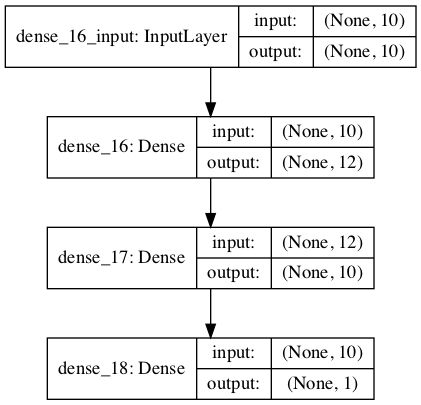

In [177]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model_Xm = Sequential()
model_Xm.add(Dense(12, input_dim=10, activation='relu'))
model_Xm.add(Dense(10, activation='relu'))
model_Xm.add(Dense(1, activation='sigmoid'))
plot_model(model_Xm, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

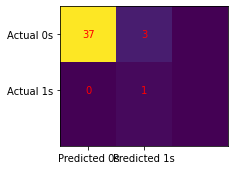

In [178]:
cm = metrics.confusion_matrix(Ym_test,prediction_Xm) 
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(2, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Ensemble

In [179]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
base = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                       max_depth=5, min_samples_split=2, min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, max_features=7, random_state=None, 
                                       max_leaf_nodes=22, min_impurity_split=1e-07, 
                                           class_weight='balanced')

model_Xm = BaggingClassifier(base_estimator=base, n_estimators=100, max_samples=1.0, max_features=1.0, 
                  bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, 
                  n_jobs=1, random_state=None, verbose=0)
model_Xm.fit(Xm_train, Ym_train)
predictions_Xm = model_Xm.predict(Xm_test)
conf_Xm = (confusion_matrix(Ym_test,predictions_Xm))
test_accuracy_Xm = metrics.accuracy_score(np.array(Ym_test), predictions_Xm)
test_accuracy_Xm

1.0

In [180]:
model_rf_Xm = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, 
                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                       max_features='auto', max_leaf_nodes=22, min_impurity_split=1e-07, 
                       bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                       warm_start=False, class_weight='balanced')
model_rf_Xm.fit(Xm_train, Ym_train)
predictions_Xm = model_rf_Xm.predict(Xm_test)
conf_Xm = (confusion_matrix(Ym_test,predictions_Xm))
test_accuracy_rf_Xm = metrics.accuracy_score(np.array(Ym_test), predictions_Xm)
test_accuracy_rf_Xm

1.0

In [181]:
from sklearn.ensemble import VotingClassifier
mods = []
for i in range(1,100): # 100 Trees provides low variance.
    # A parameter combination that were sucessfull for entropy trees.
    mods.append((str(i),DecisionTreeClassifier(criterion='entropy', splitter='best', 
                               max_depth=5, min_samples_split=2, min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                               max_leaf_nodes=22, min_impurity_split=1e-07, class_weight='balanced')))
    if(i < 80):
        # A parameter combination that were sucessfull for gini trees.
        mods.append((str(i)+"gi",DecisionTreeClassifier(criterion='gini', splitter='best', 
                               max_depth=7, min_samples_split=2, min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                               max_leaf_nodes=25, min_impurity_split=1e-07, 
                                                        class_weight={0: 1.105, 1: 1.15})))
model_Xm = VotingClassifier(estimators=mods, voting='hard', n_jobs=1)
model_Xm.fit(Xm_train, Ym_train)
predictions = model_Xm.predict(Xm_test)
conf_Xm = (confusion_matrix(Ym_test,predictions))
test_accuracy_Xm = metrics.accuracy_score(np.array(Ya_test), predictions_Xm)
test_accuracy_Xm

0.8571428571428571

In [182]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [183]:
#missing_values='NaN'
pipeline = Pipeline([("imputer", SimpleImputer(missing_values = np.nan,
                                          strategy="mean"
                                          )),
                      ("standardizer", StandardScaler()),
                      ("VotingClassifier", model_Xm)])

In [184]:
pipeline.fit(Xm,Ym)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('standardizer', StandardScaler()),
                ('VotingClassifier',
                 VotingClassifier(estimators=[('1',
                                               DecisionTreeClassifier(class_weight='balanced',
                                                                      criterion='entropy',
                                                                      max_depth=5,
                                                                      max_leaf_nodes=22,
                                                                      min_impurity_split=1e-07)),
                                              ('1gi',
                                               DecisionTreeClassifier(class_weight={0: 1.105,
                                                                                    1: 1.15},
                                                                      max_depth=7,
                                

In [185]:
Xm=Xm.fillna(Xm.mean())
Xm

MMAESerious  AEMedProd  AEOthRelHx  AERelLabData   Weight_y  AEOutcome  \
0            0.0        0.0         0.0           0.0  27.063492          1   
1            0.0        0.0         0.0           0.0  27.063492          1   
2            1.0        1.0         1.0           1.0  15.000000          0   
3            1.0        1.0         1.0           1.0  15.000000          0   
4            0.0        1.0         1.0           1.0  25.000000          0   
..           ...        ...         ...           ...        ...        ...   
201          1.0        0.0         0.0           0.0  27.063492          0   
202          1.0        0.0         0.0           0.0  27.063492          0   
203          0.0        0.0         0.0           0.0  27.063492          0   
204          0.0        0.0         0.0           0.0  27.063492          0   
205          0.0        0.0         0.0           0.0  27.063492          0   

     AEOthTrt  AETrt  AESerious  AEEffectTrt  ...  DKAMostRecent  \
0         1.0      1          0            1  ...            1.0   
1         1.0      1          0            1  ...            1.0   
2         1.0      1          1            2  ...            0.0   
3         1.0      1          1            2  ...            0.0   
4         0.0      1          1            2  ...            4.0   
..        ...    ...        ...          ...  ...            ...   
201       0.0      1          1            2  ...            2.0   
202       0.0      1          1            2  ...            2.0   
203       1.0      1          0            2  ...            0.0   
204       1.0      1          0            2  ...            0.0   
205       1.0      1          0            2  ...            0.0   

     DKANumLast12Months  SHMostRecent  SHSeizComaLast12Months  PumpType  \
0                     1             0                0.692308  8.000000   
1                     1             0                0.692308  8.000000   
2                     0             2                0.692308  3.288889   
3                     0             2                0.692308  3.288889   
4                     0             0                0.692308  3.288889   
..                  ...           ...                     ...       ...   
201                   1             1                0.692308  1.000000   
202                   1             1                0.692308  1.000000   
203                   0             0                0.692308  3.288889   
204                   0             0                0.692308  3.288889   
205                   0             0                0.692308  3.288889   

     DiagAge  Gender      Height  PtCurrMed  PreExistMedCond  
0          1       0  115.782243          0         1.000000  
1          1       0  115.782243          0         1.000000  
2          2       0  115.782243          1         0.000000  
3          2       0  115.782243          1         0.000000  
4          1       0  115.782243          0         0.184987  
..       ...     ...         ...        ...              ...  
201        2       1  115.782243          0         1.000000  
202        2       1  115.782243          0         1.000000  
203        6       1  115.782243          0         0.000000  
204        6       1  115.782243          0         0.000000  
205        6       1  115.782243          0         0.000000  

[206 rows x 28 columns]

In [186]:
dt_clf_Xm = DecisionTreeClassifier()
dt_clf_Xm = dt_clf_Xm.fit(Xm,Ym)
print(dt_clf_Xm)

DecisionTreeClassifier()


In [187]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None, splitter='best')

DecisionTreeClassifier()

In [188]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
#tree.plot_tree(dt_clf_Xm) 

In [189]:
_data_Xm = tree.export_graphviz(dt_clf_Xm, out_file="None", filled=True, rounded=True,special_characters=True)

In [190]:
import graphviz 
from graphviz import Source
_data_Xm = tree.export_graphviz(dt_clf_Xm, out_file=None)
graph = graphviz.Source(_data_Xm) 
graph.render("name of file",view = True)
import pydotplus
from IPython.display import Image 

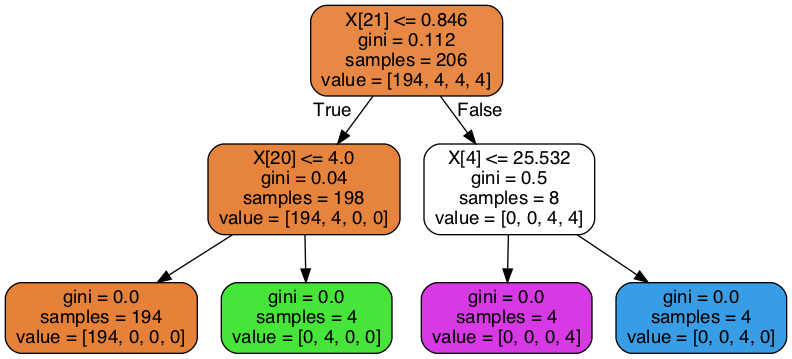

In [191]:
import pydotplus
_data_Xm = tree.export_graphviz(dt_clf_Xm, out_file=None, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(_data_Xm)  

Image(graph.create_png())

In [192]:

# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

>1, train: 0.970, test: 0.929
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000


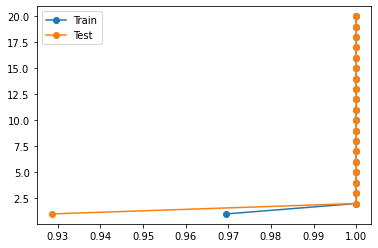

In [193]:
# split into train test sets
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm, Ym, test_size=0.2)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(Xm_train, Ym_train)
	# evaluate on the train dataset
	train_yhat = model.predict(Xm_train)
	train_acc = accuracy_score(Ym_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(Xm_test)
	test_acc = accuracy_score(Ym_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(train_scores, values, '-o', label='Train')
pyplot.plot(test_scores, values, '-o', label='Test')
pyplot.legend()
pyplot.show()

[Text(558.0, 611.55, 'X[23] <= 1.5\nentropy = 0.413\nsamples = 206\nvalue = [194, 4, 4, 4]'),
 Text(279.0, 203.85000000000002, 'entropy = 1.116\nsamples = 54\nvalue = [42, 4, 4, 4]'),
 Text(837.0, 203.85000000000002, 'entropy = 0.0\nsamples = 152\nvalue = [152, 0, 0, 0]')]

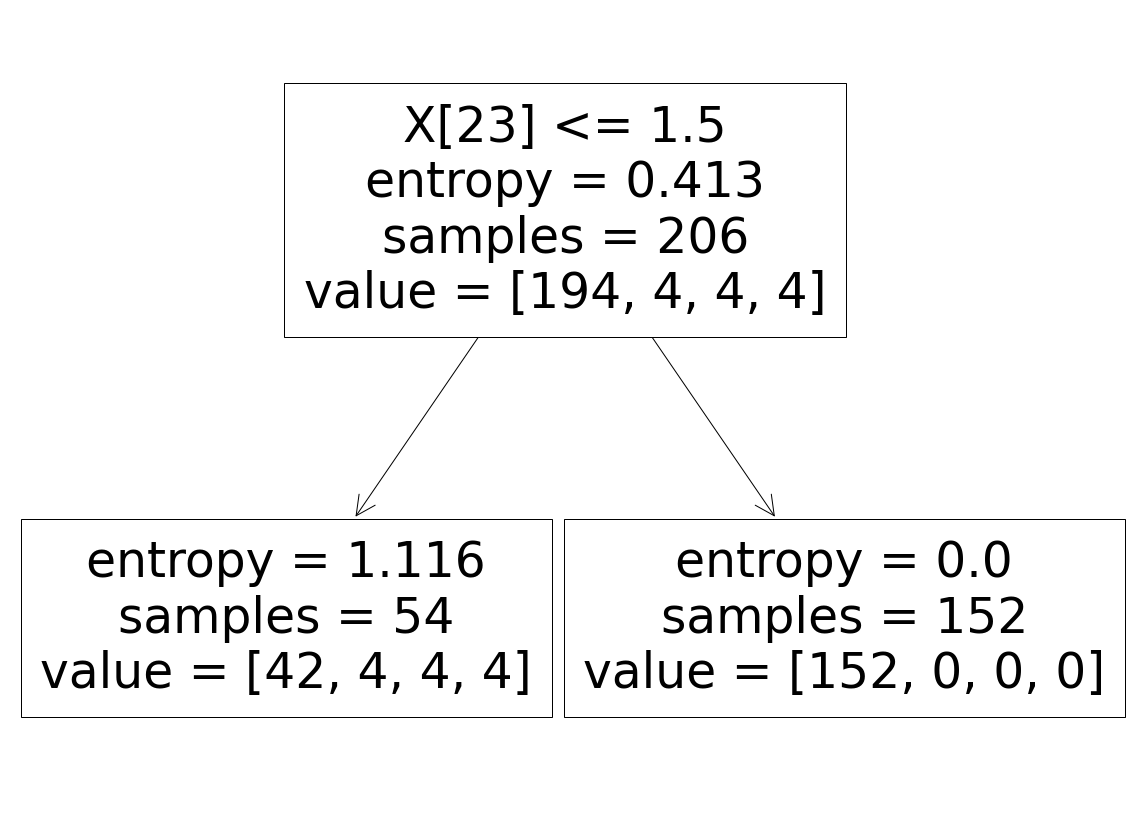

In [194]:
#CART Model
from sklearn.tree import DecisionTreeClassifier, plot_tree
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=50)
DecisionTree.fit(Xm,Ym)
plt.figure(figsize=(20,15))
plot_tree(DecisionTree)

In [195]:
DecisionTree.fit(Xm_train, Ym_train)
Ypred=DecisionTree.predict(Xm_test)
missclf_rate= 1-metrics.accuracy_score(Ym_test, Ypred)
missclf_rate

0.0714285714285714

In [196]:
score_Xm=metrics.accuracy_score(Ym_test, Ypred)
score_Xm

0.9285714285714286

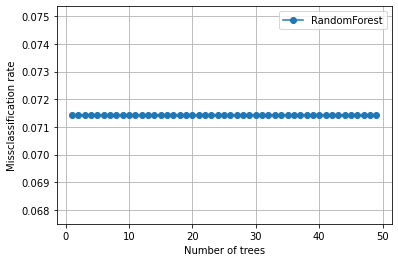

In [197]:
#random forest model
ntrees=[]
miss_clf_rate=[]
for i in range (1,50):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(Xm_train, Ym_train)
    Ypred_dt=rf.predict(Xm_test)
    ntrees.append(i)
    rate=1-metrics.accuracy_score(Ym_test, Ypred)
    miss_clf_rate.append(rate)


plt.figure()#(figsize=(20,10))
plt.plot(ntrees, miss_clf_rate, '-o', label='RandomForest')
plt.xlabel('Number of trees')
plt.ylabel('Missclassification rate')
plt.legend()
plt.grid()

In [198]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset

>1, train: 0.963, test: 0.952
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000
>21, train: 1.000, test: 1.000
>22, train: 1.000, test: 1.000
>23, train: 1.000, test: 1.000
>24, train: 1.000, test: 1.000
>25, train: 1.000, test: 1.000
>26, train: 1.000, test: 1.000
>27, train: 1.000, test: 1.000
>28, train: 1.000, test: 1.000
>29, train: 1.000, test: 1.000
>30, train: 1.000, test: 1.000
>31, train: 1.000, test: 1.000
>32, train: 1.000, test: 1.000
>33, train: 1.000

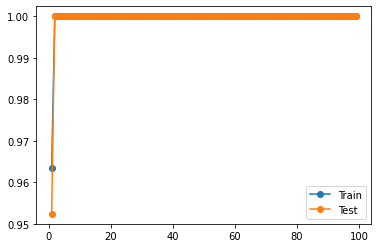

In [199]:
# split into train test sets
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm, Ym, test_size=0.2)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 100)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(Xm_train, Ym_train)
	# evaluate on the train dataset
	train_yhat = model.predict(Xm_train)
	train_acc = accuracy_score(Ym_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(Xm_test)
	test_acc = accuracy_score(Ym_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()


In [200]:
# Dataset with PCA
import Utilities.mypca as PCA
pca = PCA.MyPCA()
pca.fit(Xm_train)
PCA_x_train = pca.fit_transform(5, Xm_train)
PCA_x_val = pca.fit_transform(5, Xm_test)
print(PCA_x_train.shape)

(164, 5)


In [201]:
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm, Ym, test_size=0.2)


In [202]:
Xm_test.shape

(42, 28)

In [203]:
Xm_train.shape

(164, 28)

In [204]:

Ym_train.shape

(164,)

In [205]:
mean_x_train = np.mean(Xm_train)
std_x_train = np.std(Xm_train)
std = lambda Xm: ((Xm - mean_x_train)/std_x_train)
inv_std = lambda Xm: ((Xm*std_x_train + mean_x_train))
x_train_std1 = std(Xm_train)
x_test_std1 = std(Xm_test)

In [206]:
x_train_std1



MMAESerious  AEMedProd  AEOthRelHx  AERelLabData  Weight_y  AEOutcome  \
150     0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
172    -1.651446  -0.351123   -0.317287     -0.873751 -0.024722   6.324555   
45     -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
48      0.605530  -0.351123   -0.317287      1.144491 -0.024722  -0.158114   
54     -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
..           ...        ...         ...           ...       ...        ...   
179    -1.651446   2.848001    3.151719      1.144491 -0.410295  -0.158114   
12      0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
87      0.605530  -0.351123   -0.317287      1.144491 -0.024722  -0.158114   
188     0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
103     0.605530  -0.351123   -0.317287      1.144491 -0.036586  -0.158114   

     AEOthTrt     AETrt  AESerious  AEEffectTrt  ...  DKAMostRecent  \
150      -1.0  0.268133   0.567962    -0.142561  ...       0.889004   
172       1.0  0.268133  -1.760682    -3.482551  ...      -0.331052   
45        1.0  0.268133  -1.760682    -0.142561  ...      -0.941080   
48       -1.0  0.268133   0.567962    -0.142561  ...      -0.941080   
54        1.0  0.268133  -1.760682    -0.142561  ...      -0.941080   
..        ...       ...        ...          ...  ...            ...   
179      -1.0  0.268133   0.567962    -0.142561  ...       1.499032   
12       -1.0  0.268133   0.567962    -0.142561  ...      -0.941080   
87       -1.0  0.268133   0.567962    -0.142561  ...       0.889004   
188      -1.0  0.268133   0.567962    -0.142561  ...      -0.941080   
103       1.0  0.268133   0.567962    -0.142561  ...      -0.941080   

     DKANumLast12Months  SHMostRecent  SHSeizComaLast12Months  PumpType  \
150           -0.492366     -0.360818               -0.124212  0.028659   
172            2.031010     -0.360818               -0.124212  4.250736   
45            -0.492366      4.922582               -3.285196 -0.230242   
48            -0.492366     -0.360818               -0.124212  0.028659   
54            -0.492366     -0.360818               -0.124212  0.028659   
..                  ...           ...                     ...       ...   
179           -0.492366     -0.360818               -0.124212  0.028659   
12            -0.492366     -0.360818               -0.124212  0.028659   
87            -0.492366     -0.360818               -0.124212  0.028659   
188           -0.492366     -0.360818               -0.124212  0.028659   
103           -0.492366     -0.360818               -0.124212  0.028659   

      DiagAge    Gender    Height  PtCurrMed  PreExistMedCond  
150 -1.284291 -1.351882 -0.223373  -0.293416        -0.590043  
172 -1.284291 -1.351882 -0.223373  -0.293416         1.728288  
45  -1.284291  0.739709 -0.223373   3.408135         1.728288  
48  -0.157961  0.739709 -0.223373  -0.293416         1.728288  
54  -1.284291  0.739709 -0.223373  -0.293416        -0.590043  
..        ...       ...       ...        ...              ...  
179 -1.284291 -1.351882 -0.223373  -0.293416        -0.161183  
12   1.531534 -1.351882  3.678129  -0.293416         1.728288  
87   0.968369 -1.351882 -0.223373  -0.293416        -0.590043  
188 -0.157961  0.739709 -1.448785  -0.293416        -0.590043  
103  0.405204  0.739709  0.801490  -0.293416        -0.590043  

[164 rows x 28 columns]

In [207]:
x_test_std1

MMAESerious  AEMedProd  AEOthRelHx  AERelLabData  Weight_y  AEOutcome  \
46     -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
127     0.605530  -0.351123   -0.317287      1.144491 -0.223441  -0.158114   
173     0.605530   2.848001    3.151719      1.144491  6.690184  -0.158114   
72      0.605530  -0.351123   -0.317287      1.144491 -0.223441  -0.158114   
92      0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
74      0.605530   2.848001   -0.317287     -0.873751 -0.024722  -0.158114   
29     -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
99      0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
114     0.605530  -0.351123   -0.317287      1.144491 -0.223441  -0.158114   
189     0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
147    -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
135     0.605530   2.848001    3.151719      1.144491 -0.024722  -0.158114   
142    -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
13      0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
9       0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
196     0.605530  -0.351123   -0.317287      1.144491 -0.036586  -0.158114   
108     0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
157     0.605530  -0.351123   -0.317287      1.144491 -0.024722  -0.158114   
177     0.605530   2.848001    3.151719      1.144491 -2.278843  -0.158114   
158     0.605530  -0.351123   -0.317287      1.144491 -0.024722  -0.158114   
129     0.605530  -0.351123   -0.317287      1.144491 -0.223441  -0.158114   
68      0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
40      0.605530  -0.351123   -0.317287      1.144491 -0.024722  -0.158114   
39      0.605530  -0.351123   -0.317287      1.144491 -0.024722  -0.158114   
100     0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
94     -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
22      0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
93     -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
109     0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
31      0.605530   2.848001    3.151719      1.144491 -0.024722  -0.158114   
131     0.605530  -0.351123   -0.317287     -0.873751 -2.652552  -0.158114   
187    -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
175    -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
76     -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
205    -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
152     0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
57      0.605530  -0.351123   -0.317287      1.144491 -0.024722  -0.158114   
182     0.605530  -0.351123   -0.317287      1.144491 -0.223441  -0.158114   
130     0.605530  -0.351123   -0.317287     -0.873751 -2.652552  -0.158114   
2       0.605530   2.848001    3.151719      1.144491 -2.278843  -0.158114   
62     -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
91      0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   

     AEOthTrt     AETrt  AESerious  AEEffectTrt  ...  DKAMostRecent  \
46        1.0  0.268133  -1.760682    -0.142561  ...      -0.941080   
127      -1.0  0.268133   0.567962     3.197430  ...      -0.941080   
173      -1.0  0.268133   0.567962    -0.142561  ...       0.889004   
72       -1.0  0.268133   0.567962     3.197430  ...      -0.941080   
92        1.0  0.268133   0.567962    -0.142561  ...       0.889004   
74       -1.0  0.268133   0.567962    -0.142561  ...       2.109060   
29       -1.0  0.268133  -1.760682    -0.142561  ...       0.278976   
99       -1.0  0.268133   0.567962    -0.142561  ...      -0.941080   
114      -1

In [208]:
Diab2=DiabScreening_data[['PtID','PreExistMedCond','PtCurrMed','EligCritMet','ExclCritAbsent','Gender','Weight','Height','InsModPump','InsModInjections','PumpType','DiagAge','PEAbnormal','SHMostRecent',
       'SHSeizComa', 'SHSeizComaLast12Months', 'DKAMostRecent',
       'DKANumLast12Months']]
Diab2

PtID  PreExistMedCond  PtCurrMed  EligCritMet  ExclCritAbsent  Gender  \
0      33         1.000000        0.0            1               1     0.0   
1     137         0.000000        0.0            1               1     1.0   
2     136         0.184987        0.0            1               1     1.0   
3      42         0.000000        0.0            1               1     0.0   
4      37         1.000000        0.0            1               1     1.0   
..    ...              ...        ...          ...             ...     ...   
395    50         0.000000        0.0            1               1     1.0   
396     6         1.000000        0.0            1               1     1.0   
397    57         0.000000        1.0            1               1     0.0   
398    19         1.000000        1.0            1               1     1.0   
399   107         0.000000        0.0            1               1     1.0   

        Weight      Height  InsModPump  InsModInjections  PumpType  DiagAge  \
0    25.590654  115.782243         1.0               1.0  8.000000        1   
1    25.590654  115.782243         1.0               1.0  7.000000        1   
2    25.590654  115.782243         1.0               1.0  5.000000        1   
3    25.590654  115.782243         1.0               1.0  1.000000        4   
4    25.590654  115.782243         1.0               1.0  1.000000        4   
..         ...         ...         ...               ...       ...      ...   
395  21.700000  115.200000         1.0               1.0  3.288889        1   
396  22.300000  117.000000         1.0               1.0  3.288889        2   
397  25.590654  115.782243         1.0               1.0  3.288889        3   
398  25.590654  115.782243         1.0               1.0  3.288889        1   
399  25.590654  115.782243         1.0               1.0  3.000000        2   

    PEAbnormal  SHMostRecent  SHSeizComa  SHSeizComaLast12Months  \
0          NaN           0.0           0                0.692308   
1          NaN           0.0           0                0.692308   
2          NaN           1.0           1                1.000000   
3          NaN           0.0           0                0.692308   
4          NaN           0.0           0                0.692308   
..         ...           ...         ...                     ...   
395        0.0           0.0           0                0.692308   
396        0.0           0.0           0                0.692308   
397        NaN           0.0           0                0.692308   
398        NaN           5.0           1                1.000000   
399        NaN           3.0           1                0.000000   

     DKAMostRecent  DKANumLast12Months  
0              1.0                   1  
1              0.0                   0  
2              1.0                   1  
3              0.0                   0  
4              3.0                   0  
..             ...                 ...  
395            0.0                   0  
396            3.0                   0  
397            0.0                   0  
398            4.0                   0  
399            3.0                   0  

[400 rows x 18 columns]

In [209]:
cols1=Diab3.columns
cols1


Index(['PreExistMedCond', 'PtCurrMed', 'EligCritMet', 'ExclCritAbsent',
       'Gender', 'Weight', 'Height', 'InsModPump', 'InsModInjections',
       'PumpType', 'DiagAge', 'SHMostRecent', 'SHSeizComa',
       'SHSeizComaLast12Months', 'DKAMostRecent', 'DKANumLast12Months',
       'BldPrSys', 'BldPrDia', 'PEHeartRt', 'FingStkBG'],
      dtype='object')

In [210]:
trainingdata1 = pd.DataFrame(np.hstack((x_train_std1, Ym_train[:,np.newaxis])), columns = cols4)
validationdata1 = pd.DataFrame(np.hstack((x_test_std1, Ym_test[:,np.newaxis])), columns = cols4)
trainingdata1.head()

MMAESerious  AEMedProd  AEOthRelHx  AERelLabData  Weight_y  AEOutcome  \
0     0.605530  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
1    -1.651446  -0.351123   -0.317287     -0.873751 -0.024722   6.324555   
2    -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   
3     0.605530  -0.351123   -0.317287      1.144491 -0.024722  -0.158114   
4    -1.651446  -0.351123   -0.317287     -0.873751 -0.024722  -0.158114   

   AEOthTrt     AETrt  AESerious  AEEffectTrt  ...  DKANumLast12Months  \
0      -1.0  0.268133   0.567962    -0.142561  ...           -0.492366   
1       1.0  0.268133  -1.760682    -3.482551  ...            2.031010   
2       1.0  0.268133  -1.760682    -0.142561  ...           -0.492366   
3      -1.0  0.268133   0.567962    -0.142561  ...           -0.492366   
4       1.0  0.268133  -1.760682    -0.142561  ...           -0.492366   

   SHMostRecent  SHSeizComa  SHSeizComaLast12Months  PumpType   DiagAge  \
0     -0.360818   -0.124212                0.028659 -1.284291 -1.351882   
1     -0.360818   -0.124212                4.250736 -1.284291 -1.351882   
2      4.922582   -3.285196               -0.230242 -1.284291  0.739709   
3     -0.360818   -0.124212                0.028659 -0.157961  0.739709   
4     -0.360818   -0.124212                0.028659 -1.284291  0.739709   

     Gender    Height  PtCurrMed  PreExistMedCond  
0 -0.223373 -0.293416  -0.590043              0.0  
1 -0.223373 -0.293416   1.728288              0.0  
2 -0.223373  3.408135   1.728288              1.0  
3 -0.223373 -0.293416   1.728288              0.0  
4 -0.223373 -0.293416  -0.590043              0.0  

[5 rows x 29 columns]

In [211]:
trainingdata1.columns

Index(['MMAESerious', 'AEMedProd', 'AEOthRelHx', 'AERelLabData', 'Weight_y',
       'AEOutcome', 'AEOthTrt', 'AETrt', 'AESerious', 'AEEffectTrt',
       'AEIntensity', 'AEPrEnroll', 'MedicalCondition', 'MedicalConditionMM',
       'FingStkBG', 'PEHeartRt', 'BldPrSys', 'BldPrDia', 'DKAMostRecent',
       'DKANumLast12Months', 'SHMostRecent', 'SHSeizComa',
       'SHSeizComaLast12Months', 'PumpType', 'DiagAge', 'Gender', 'Height',
       'PtCurrMed', 'PreExistMedCond'],
      dtype='object')

In [212]:
Xm

MMAESerious  AEMedProd  AEOthRelHx  AERelLabData   Weight_y  AEOutcome  \
0            0.0        0.0         0.0           0.0  27.063492          1   
1            0.0        0.0         0.0           0.0  27.063492          1   
2            1.0        1.0         1.0           1.0  15.000000          0   
3            1.0        1.0         1.0           1.0  15.000000          0   
4            0.0        1.0         1.0           1.0  25.000000          0   
..           ...        ...         ...           ...        ...        ...   
201          1.0        0.0         0.0           0.0  27.063492          0   
202          1.0        0.0         0.0           0.0  27.063492          0   
203          0.0        0.0         0.0           0.0  27.063492          0   
204          0.0        0.0         0.0           0.0  27.063492          0   
205          0.0        0.0         0.0           0.0  27.063492          0   

     AEOthTrt  AETrt  AESerious  AEEffectTrt  ...  DKAMostRecent  \
0         1.0      1          0            1  ...            1.0   
1         1.0      1          0            1  ...            1.0   
2         1.0      1          1            2  ...            0.0   
3         1.0      1          1            2  ...            0.0   
4         0.0      1          1            2  ...            4.0   
..        ...    ...        ...          ...  ...            ...   
201       0.0      1          1            2  ...            2.0   
202       0.0      1          1            2  ...            2.0   
203       1.0      1          0            2  ...            0.0   
204       1.0      1          0            2  ...            0.0   
205       1.0      1          0            2  ...            0.0   

     DKANumLast12Months  SHMostRecent  SHSeizComaLast12Months  PumpType  \
0                     1             0                0.692308  8.000000   
1                     1             0                0.692308  8.000000   
2                     0             2                0.692308  3.288889   
3                     0             2                0.692308  3.288889   
4                     0             0                0.692308  3.288889   
..                  ...           ...                     ...       ...   
201                   1             1                0.692308  1.000000   
202                   1             1                0.692308  1.000000   
203                   0             0                0.692308  3.288889   
204                   0             0                0.692308  3.288889   
205                   0             0                0.692308  3.288889   

     DiagAge  Gender      Height  PtCurrMed  PreExistMedCond  
0          1       0  115.782243          0         1.000000  
1          1       0  115.782243          0         1.000000  
2          2       0  115.782243          1         0.000000  
3          2       0  115.782243          1         0.000000  
4          1       0  115.782243          0         0.184987  
..       ...     ...         ...        ...              ...  
201        2       1  115.782243          0         1.000000  
202        2       1  115.782243          0         1.000000  
203        6       1  115.782243          0         0.000000  
204        6       1  115.782243          0         0.000000  
205        6       1  115.782243          0         0.000000  

[206 rows x 28 columns]

In [213]:
['MMAESerious', 'AEMedProd', 'AEOthRelHx', 'AERelLabData', 'Weight_y',
       'AEOutcome', 'AEOthTrt', 'AETrt', 'AESerious', 'AEEffectTrt',
       'AEIntensity', 'AEPrEnroll', 'MedicalCondition', 'MedicalConditionMM',
       'FingStkBG', 'PEHeartRt', 'BldPrSys', 'BldPrDia', 'DKAMostRecent',
       'DKANumLast12Months', 'SHMostRecent', 'SHSeizComa',
       'SHSeizComaLast12Months', 'PumpType', 'DiagAge', 'Gender', 'Height',
       'PtCurrMed', 'PreExistMedCond']

['MMAESerious',
 'AEMedProd',
 'AEOthRelHx',
 'AERelLabData',
 'Weight_y',
 'AEOutcome',
 'AEOthTrt',
 'AETrt',
 'AESerious',
 'AEEffectTrt',
 'AEIntensity',
 'AEPrEnroll',
 'MedicalCondition',
 'MedicalConditionMM',
 'FingStkBG',
 'PEHeartRt',
 'BldPrSys',
 'BldPrDia',
 'DKAMostRecent',
 'DKANumLast12Months',
 'SHMostRecent',
 'SHSeizComa',
 'SHSeizComaLast12Months',
 'PumpType',
 'DiagAge',
 'Gender',
 'Height',
 'PtCurrMed',
 'PreExistMedCond']

In [214]:
BFE_cols1 = ['MMAESerious', 'AEMedProd', 'AEOthRelHx', 'AERelLabData', 'Weight_y',
       'AEOutcome', 'AEOthTrt', 'AETrt', 'AESerious', 'AEEffectTrt',
       'AEIntensity', 'AEPrEnroll', 'MedicalCondition', 'MedicalConditionMM',
       'FingStkBG', 'PEHeartRt', 'BldPrSys', 'BldPrDia', 'DKAMostRecent',
       'DKANumLast12Months', 'SHMostRecent', 'SHSeizComa',
       'SHSeizComaLast12Months', 'PumpType', 'DiagAge', 'Gender', 'Height',
       'PtCurrMed', 'PreExistMedCond']
BFE_x_train1 = Diabetes2[BFE_cols1]
BFE_x_val1 = validationdata1[BFE_cols1]
print(BFE_x_train1.shape)

(206, 29)


In [215]:
BFE_cols1 = ['MMAESerious','AEMedProd','AEOthRelHx','AERelLabData','Weight_y','AEOutcome','AEOthTrt','AETrt','AESerious','AEEffectTrt','AEIntensity','AEPrEnroll','MedicalCondition', 'MedicalConditionMM','FingStkBG','PEHeartRt','BldPrSys', 'BldPrDia','DKAMostRecent', 'DKANumLast12Months','SHMostRecent', 'SHSeizComaLast12Months','PumpType',
       'DiagAge','Gender', 'Height','PtCurrMed','PreExistMedCond']
BFE_x_train1 = Diabetes2[BFE_cols1]
BFE_x_val1 = validationdata1[BFE_cols1]
print(BFE_x_train1.shape)

(206, 28)


In [216]:
BFE_x_train1

BFE_x_train1=BFE_x_train1.fillna(BFE_x_train1.mean())
BFE_x_train1

MMAESerious  AEMedProd  AEOthRelHx  AERelLabData   Weight_y  AEOutcome  \
0            0.0        0.0         0.0           0.0  27.063492          1   
1            0.0        0.0         0.0           0.0  27.063492          1   
2            1.0        1.0         1.0           1.0  15.000000          0   
3            1.0        1.0         1.0           1.0  15.000000          0   
4            0.0        1.0         1.0           1.0  25.000000          0   
..           ...        ...         ...           ...        ...        ...   
201          1.0        0.0         0.0           0.0  27.063492          0   
202          1.0        0.0         0.0           0.0  27.063492          0   
203          0.0        0.0         0.0           0.0  27.063492          0   
204          0.0        0.0         0.0           0.0  27.063492          0   
205          0.0        0.0         0.0           0.0  27.063492          0   

     AEOthTrt  AETrt  AESerious  AEEffectTrt  ...  DKAMostRecent  \
0         1.0      1          0            1  ...            1.0   
1         1.0      1          0            1  ...            1.0   
2         1.0      1          1            2  ...            0.0   
3         1.0      1          1            2  ...            0.0   
4         0.0      1          1            2  ...            4.0   
..        ...    ...        ...          ...  ...            ...   
201       0.0      1          1            2  ...            2.0   
202       0.0      1          1            2  ...            2.0   
203       1.0      1          0            2  ...            0.0   
204       1.0      1          0            2  ...            0.0   
205       1.0      1          0            2  ...            0.0   

     DKANumLast12Months  SHMostRecent  SHSeizComaLast12Months  PumpType  \
0                     1             0                0.692308  8.000000   
1                     1             0                0.692308  8.000000   
2                     0             2                0.692308  3.288889   
3                     0             2                0.692308  3.288889   
4                     0             0                0.692308  3.288889   
..                  ...           ...                     ...       ...   
201                   1             1                0.692308  1.000000   
202                   1             1                0.692308  1.000000   
203                   0             0                0.692308  3.288889   
204                   0             0                0.692308  3.288889   
205                   0             0                0.692308  3.288889   

     DiagAge  Gender      Height  PtCurrMed  PreExistMedCond  
0          1       0  115.782243          0         1.000000  
1          1       0  115.782243          0         1.000000  
2          2       0  115.782243          1         0.000000  
3          2       0  115.782243          1         0.000000  
4          1       0  115.782243          0         0.184987  
..       ...     ...         ...        ...              ...  
201        2       1  115.782243          0         1.000000  
202        2       1  115.782243          0         1.000000  
203        6       1  115.782243          0         0.000000  
204        6       1  115.782243          0         0.000000  
205        6       1  115.782243          0         0.000000  

[206 rows x 28 columns]

In [217]:
Diabetes2.columns

Index(['MMAESerious', 'AEMedProd', 'AEOthRelHx', 'AERelLabData', 'Weight_y',
       'AEOutcome', 'AEOthTrt', 'AETrt', 'AESerious', 'AEEffectTrt',
       'AEIntensity', 'AEPrEnroll', 'MedicalCondition', 'MedicalConditionMM',
       'FingStkBG', 'PEHeartRt', 'BldPrSys', 'BldPrDia', 'DKAMostRecent',
       'DKANumLast12Months', 'SHMostRecent', 'SHSeizComa',
       'SHSeizComaLast12Months', 'PumpType', 'DiagAge', 'Gender', 'Height',
       'PtCurrMed', 'PreExistMedCond'],
      dtype='object')

<AxesSubplot:>

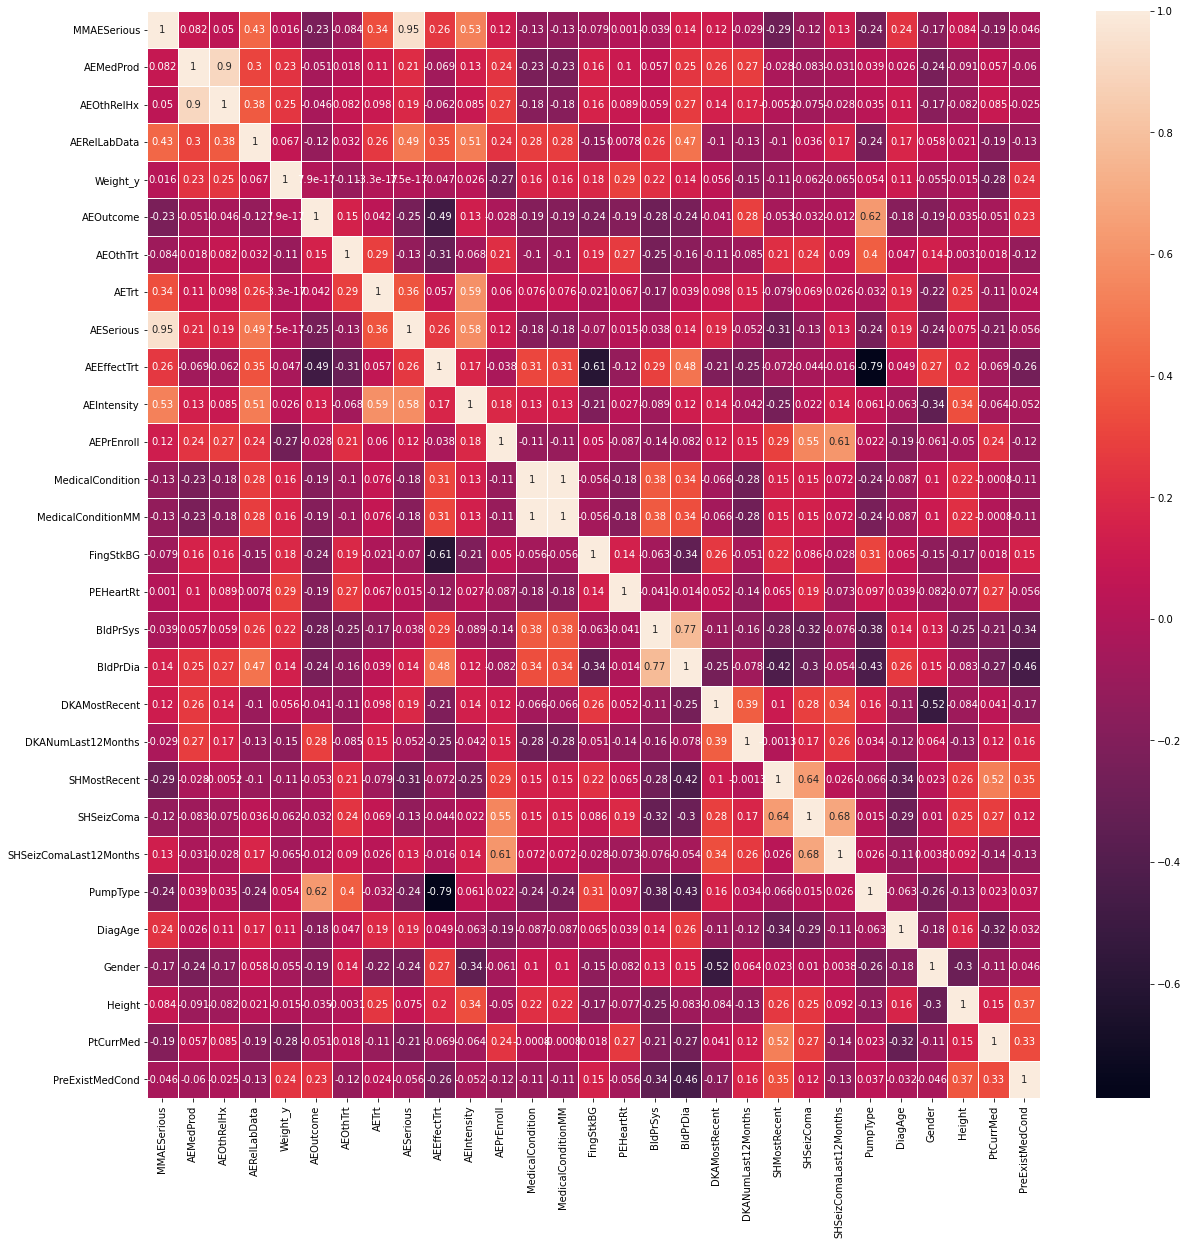

In [218]:
plt.figure(figsize=(20,20))
sns.heatmap(Diabetes2.corr(),annot=True,lw=1)

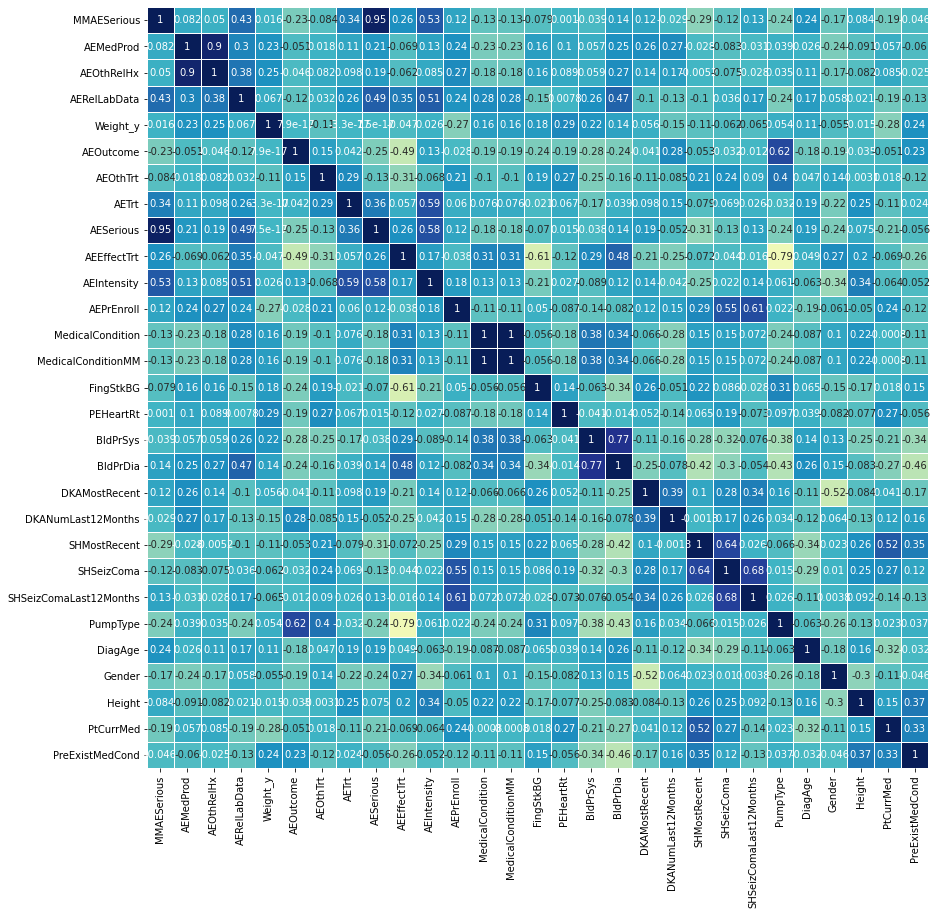

In [219]:
plt.figure(figsize=(14,14))
sns.heatmap(Diabetes2.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",lw=1)
plt.show()

Text(0.5, 1.0, 'FingStkBG vs SHSeizComaLast12Months')

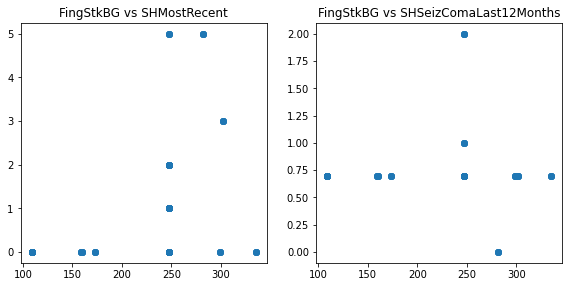

In [220]:
# predictor vs total_payer_coverage
plt.figure(figsize=(15,15)) # defining figure size, figure is basically the canvas on which you can make plots
plt.subplot(3,3,1) # (#rows, #col, index)
plt.scatter(Diabetes2['FingStkBG'],Diabetes2['SHMostRecent'])
plt.title("FingStkBG vs SHMostRecent")

plt.subplot(3,3,2) # (#rows, #col, index)
plt.scatter(Diabetes2['FingStkBG'],Diabetes2['SHSeizComaLast12Months'])
plt.title("FingStkBG vs SHSeizComaLast12Months")

Text(0.5, 1.0, 'Ethnicity vs SHSeizComaLast12Months')

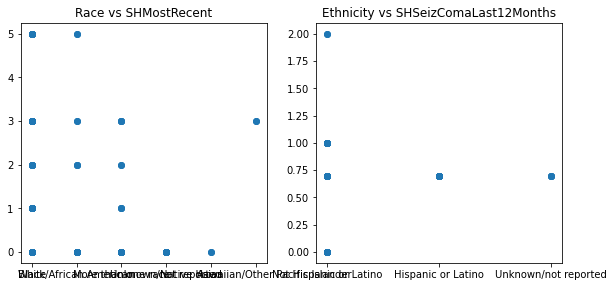

In [221]:
# predictor vs total_payer_coverage
plt.figure(figsize=(15,15)) # defining figure size, figure is basically the canvas on which you can make plots
plt.subplot(3,3,1) # (#rows, #col, index)
plt.scatter(DiabScreening_data['Race'],DiabScreening_data['SHMostRecent'])
plt.title("Race vs SHMostRecent")

plt.subplot(3,3,2) # (#rows, #col, index)
plt.scatter(DiabScreening_data['Ethnicity'],DiabScreening_data['SHSeizComaLast12Months'])
plt.title("Ethnicity vs SHSeizComaLast12Months")

Text(0.5, 1.0, 'PumpType vs SHSeizComaLast12Months')

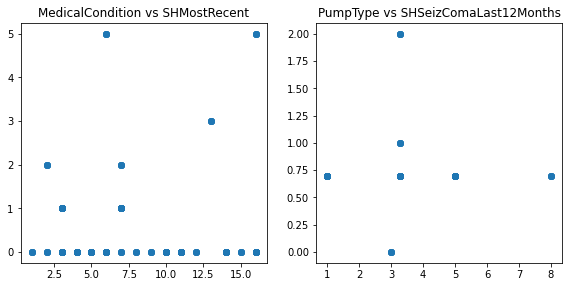

In [222]:
# predictor vs total_payer_coverage
plt.figure(figsize=(15,15)) # defining figure size, figure is basically the canvas on which you can make plots
plt.subplot(3,3,1) # (#rows, #col, index)
plt.scatter(Diabetes1['MedicalCondition'],Diabetes1['SHMostRecent'])
plt.title("MedicalCondition vs SHMostRecent")

plt.subplot(3,3,2) # (#rows, #col, index)
plt.scatter(Diabetes1['PumpType'],Diabetes1['SHSeizComaLast12Months'])
plt.title("PumpType vs SHSeizComaLast12Months")

In [223]:
Ym_train.shape

(164,)

In [224]:
from sklearn.svm import SVC
LR = LogisticRegression()
GB = GaussianNB() # 
KN = KNeighborsClassifier(n_neighbors=4, p = 2) # 4 Neighbors by euclidian distance.
DT_GINI = DecisionTreeClassifier(criterion="gini",max_depth=4) # Decision Tree with Gini impurity for quality of split
DT_IG = DecisionTreeClassifier(criterion="entropy",max_depth=4) # Information gain for quality of split
SV = SVC() # Support vector machine classifier.

modelnames = ["Logistic regression","Gaussian Naive Bayes", "4-Neighbors","Decisiontree Gini",
              "Decisiontree Information gain", "Support vector machine"]

models = zip(modelnames,[LR, GB, KN, DT_GINI, DT_IG, SV])
results_PCA = []
results_BFE = []
results = []

for name,model in models:
    kfold = KFold(n_splits=18)
    cv_result_PCA = cross_val_score(model, PCA_x_train, Ym_train, cv = kfold,scoring = "accuracy")
    cv_result_BFE = cross_val_score(model, BFE_x_train1, Ym, cv = kfold,scoring = "accuracy")
   # cv_result_BFE = cross_val_score(model, Xd_train, Yd_train, cv = kfold,scoring = "accuracy")
    cv_result = cross_val_score(model, Xm_train, Ym_train, cv = kfold,scoring = "accuracy")
    results_PCA.append(cv_result_PCA)
    results_BFE.append(cv_result_BFE)
    results.append(cv_result)

print("PCA")
for name, res in zip(modelnames, results_PCA):
    print(name,res.mean())
print()
print("BFE")
for name, res in zip(modelnames, results_BFE):
    print(name,res.mean())
print()
print("All Data")
for name, res in zip(modelnames, results):
    print(name,res.mean())


PCA
Logistic regression 0.9518518518518518
Gaussian Naive Bayes 0.5320987654320987
4-Neighbors 0.9518518518518518
Decisiontree Gini 0.9518518518518518
Decisiontree Information gain 0.9518518518518518
Support vector machine 0.9518518518518518

BFE
Logistic regression 1.0
Gaussian Naive Bayes 1.0
4-Neighbors 0.9419191919191918
Decisiontree Gini 1.0
Decisiontree Information gain 1.0
Support vector machine 0.9419191919191918

All Data
Logistic regression 1.0
Gaussian Naive Bayes 1.0
4-Neighbors 0.9641975308641975
Decisiontree Gini 1.0
Decisiontree Information gain 1.0
Support vector machine 0.9518518518518518


[Text(0, 0, 'Logistic regression'),
 Text(1, 0, 'Gaussian Naive Bayes'),
 Text(2, 0, '4-Neighbors'),
 Text(3, 0, 'Decisiontree Gini'),
 Text(4, 0, 'Decisiontree Information gain'),
 Text(5, 0, 'Support vector machine')]

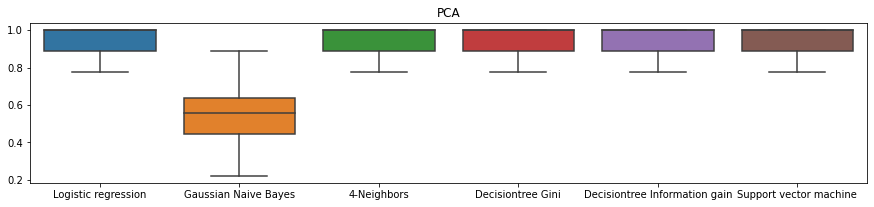

In [225]:
f, ax = plt.subplots(figsize=(15,10))
plt.subplot(3, 1, 1)
ax = sns.boxplot(data=results_PCA)
ax.set_title("PCA")
ax.set_xticklabels(modelnames)
